# Analysis of results

Packages

In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from pathlib import Path

BASE_DIR = Path(os.path.abspath(''))
os.chdir(BASE_DIR)
print(f'Working directory: {os.getcwd()}')

Working directory: c:\Users\jespe\Documents\GitHub_local\ARFusion


## Unimodal Phenotype Model

### Based on Fully Random Masking

In [2]:
run_name = 'analysis_run'
results_dir = os.path.join(BASE_DIR, 'results', 'pheno', run_name)
ab_stats = pd.read_csv(os.path.join(results_dir, 'ab_stats.csv'))
ab_stats.set_index('antibiotic', inplace=True)
iso_stats = pd.read_csv(os.path.join(results_dir, 'iso_stats.csv'))

#### Antibiotic stats

In [3]:
ab_stats

,num_tot,num_S,num_R,num_pred_S,num_pred_R,num_correct,num_correct_S,num_correct_R,accuracy,sensitivity,specificity,precision,F1
antibiotic,,,,,,,,,,,,,
AMP,39159,17409,21750,19935,19224,29401,13793,15608,0.750811,0.717609,0.792291,0.811902,0.761849
CTX,47066,42494,4572,43075,3991,45687,42095,3592,0.970701,0.785652,0.990610,0.900025,0.838958
GEN,53256,48861,4395,50600,2656,49945,48075,1870,0.937829,0.425484,0.983914,0.704066,0.530421
TOB,26872,24597,2275,25145,1727,25818,24344,1474,0.960777,0.647912,0.989714,0.853503,0.736632
CIP,57079,45977,11102,49168,7911,51334,44700,6634,0.899350,0.597550,0.972225,0.838579,0.697838
CAZ,51899,47591,4308,47788,4111,50618,47049,3569,0.975317,0.828459,0.988611,0.868159,0.847844
CRO,16740,15203,1537,15302,1438,16375,15070,1305,0.978196,0.849057,0.991252,0.907510,0.877311
OFX,5496,4501,995,4624,872,5261,4445,816,0.957242,0.820101,0.987558,0.935780,0.874130
AMX,14227,6512,7715,6468,7759,10851,4802,6049,0.762705,0.784057,0.737408,0.779611,0.781828


**Fig 1**: Compare the accuracy of each antibiotic to the data imbalance

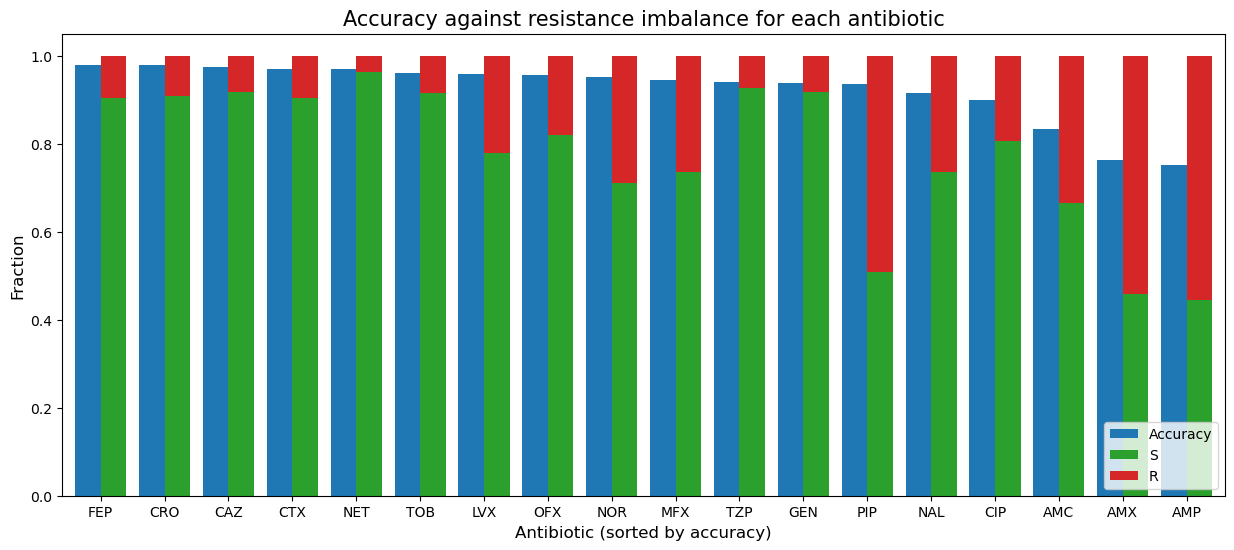

In [4]:
sorted_ab_stats = ab_stats.sort_values(by='accuracy', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']

fig, ax = plt.subplots(figsize=(15, 6))
bar1 = sorted_ab_stats['accuracy'].plot.bar(rot=0, width=-0.4, align='edge', color='tab:blue', ax=ax)
bar2 = sorted_ab_stats[['S_frac', 'R_frac']].plot.bar(
    rot=0, stacked=True, width=0.4, align='edge', color=['tab:green', 'tab:red'], ax=ax
)
ax.set_title('Accuracy against resistance imbalance for each antibiotic', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by accuracy)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.legend(labels=['Accuracy', 'S', 'R'], loc='lower right')   
plt.show()

**Fig 2**: Comparing distributions of predictions to true distributions

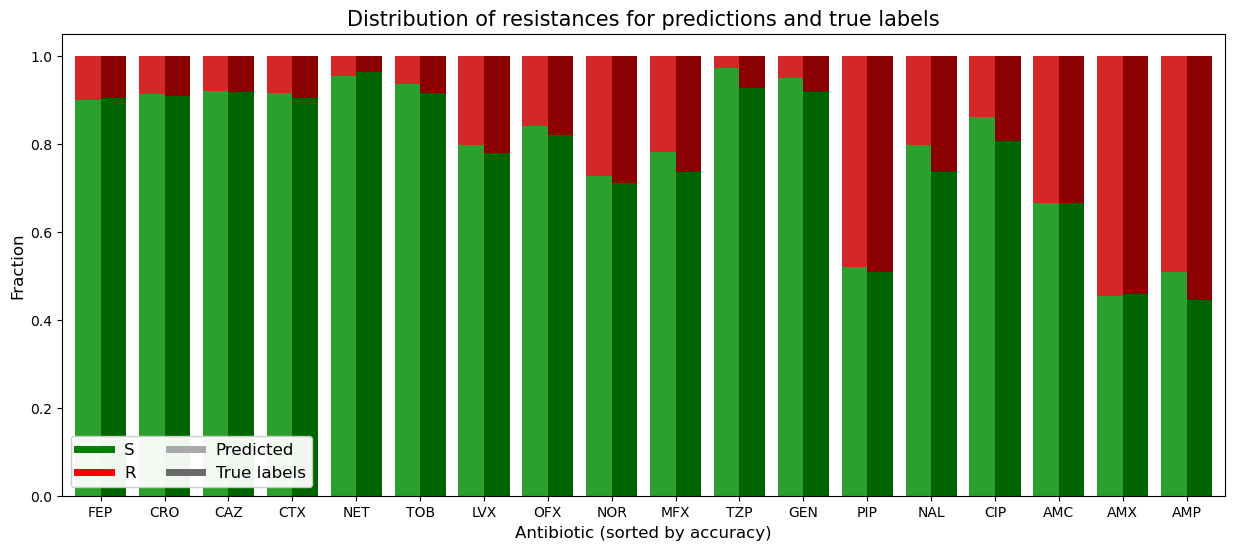

In [5]:
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

fig, ax = plt.subplots(figsize=(15, 6))
bar_pred = sorted_ab_stats[['S_frac_pred', 'R_frac_pred']].plot.bar(
    rot=0, stacked=True, width=-0.4, align='edge', color=['tab:green', 'tab:red'], ax=ax
)
bar_true = sorted_ab_stats[['S_frac', 'R_frac']].plot.bar(
    rot=0, stacked=True, width=0.4, align='edge', color=['darkgreen', 'darkred'], ax=ax
)
ax.set_title('Distribution of resistances for predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by accuracy)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)

from matplotlib.lines import Line2D

S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
ax.legend([S_line, R_line, pred_line, true_line], 
          ['S', 'R', 'Predicted', 'True labels'], 
          loc='lower left', ncol=2, fontsize=12, framealpha=0.95
)
plt.show()

**Fig 3**: Combining Fig 1 and Fig 2 into one plot

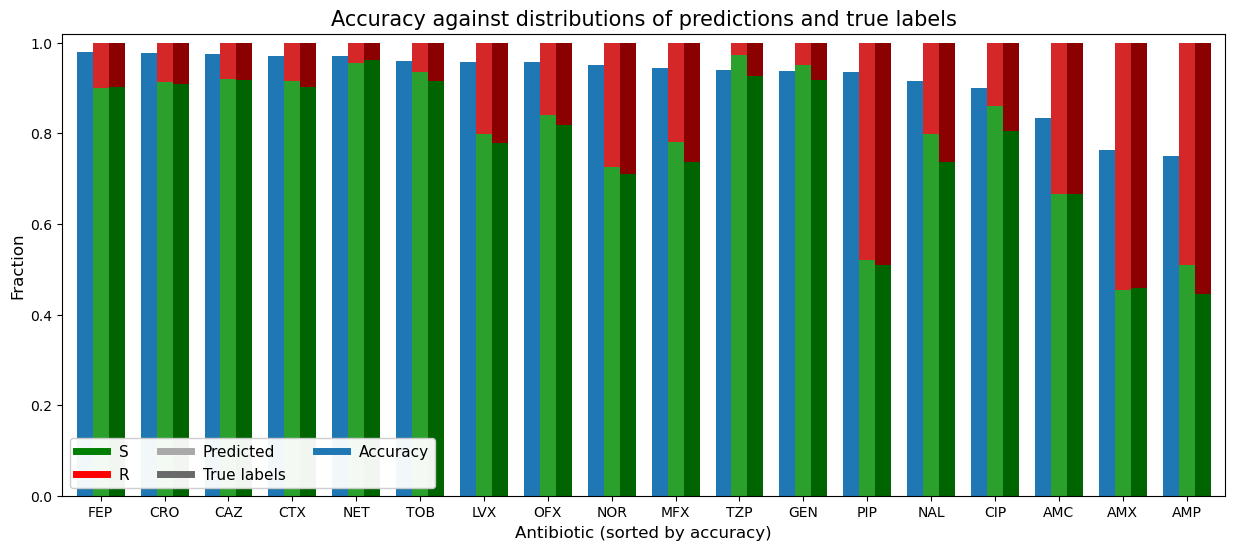

In [6]:
sorted_ab_stats = ab_stats.sort_values(by='accuracy', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(15, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['accuracy'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('Accuracy against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by accuracy)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'Accuracy'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

The same for sensitivity - ability to capture all *resistant* cases

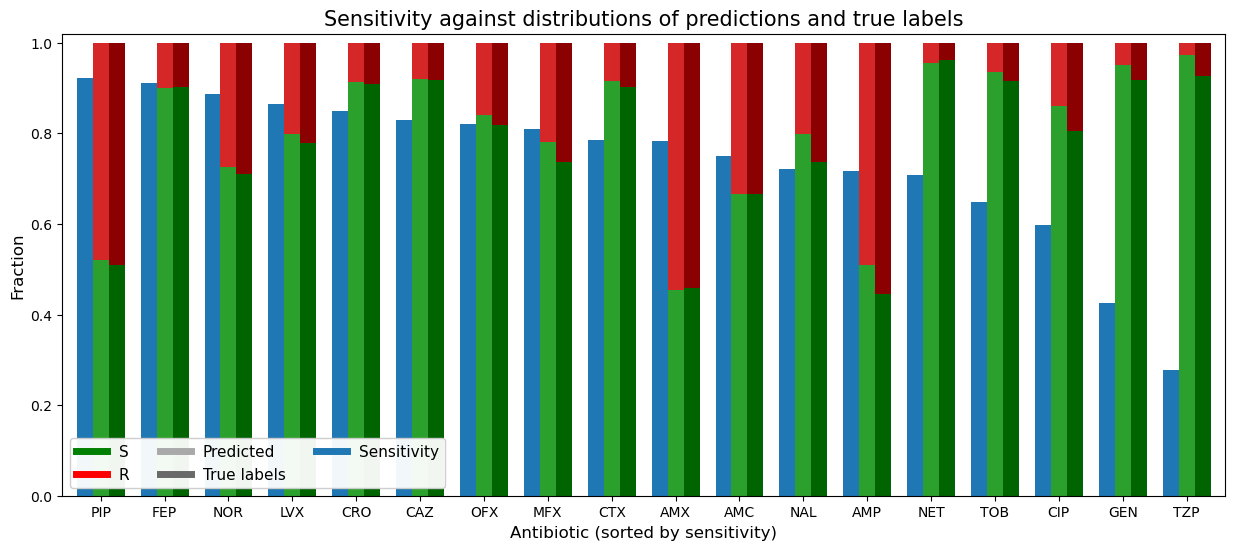

In [7]:
sorted_ab_stats = ab_stats.sort_values(by='sensitivity', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(15, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['sensitivity'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('Sensitivity against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by sensitivity)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'Sensitivity'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

The same for specificity - ability to capture all *sensitive* cases

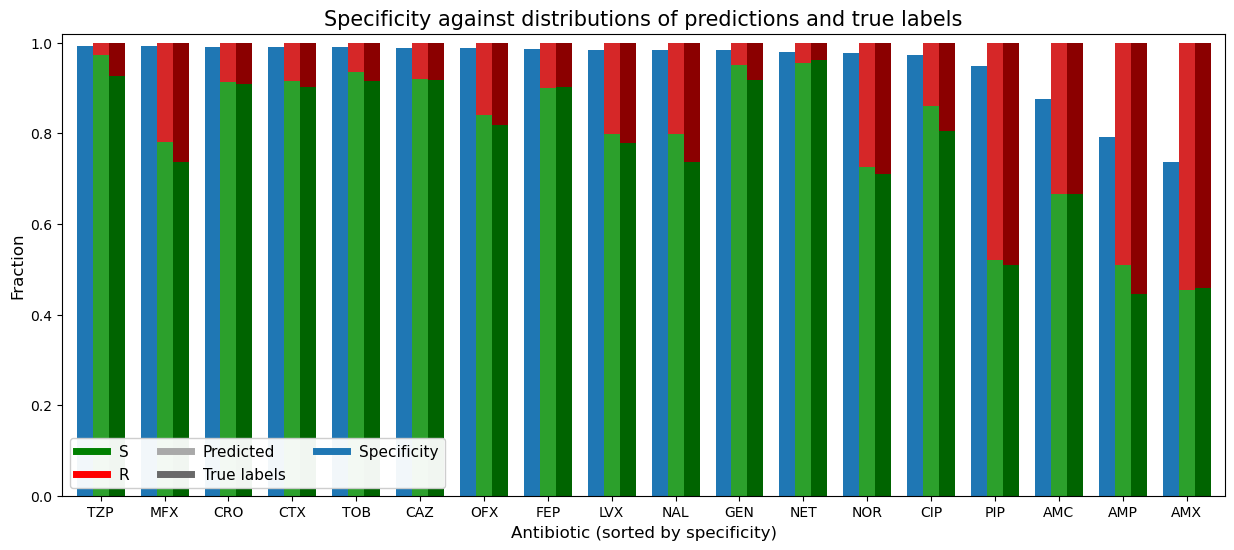

In [8]:
sorted_ab_stats = ab_stats.sort_values(by='specificity', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(15, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['specificity'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('Specificity against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by specificity)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'Specificity'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

Now F1 score

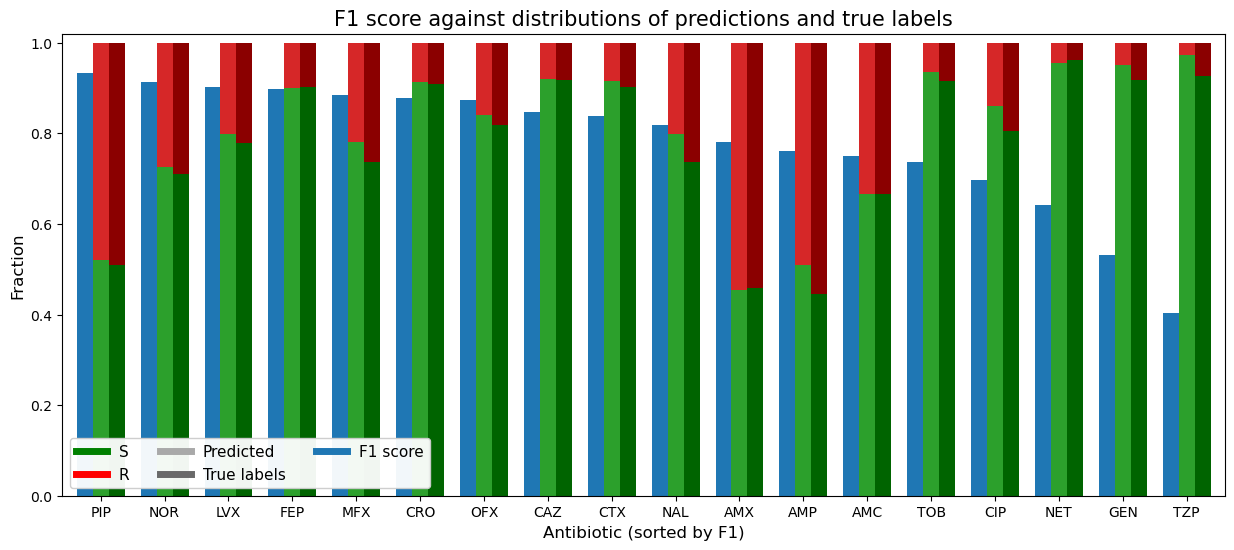

In [9]:
sorted_ab_stats = ab_stats.sort_values(by='F1', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(15, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['F1'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('F1 score against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by F1)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'F1 score'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

#### Isolate stats

In [10]:
iso_stats.head(n=20)

,year,country,gender,age,num_ab,num_R,num_S,num_masked,num_masked_S,num_masked_R,correct_S,correct_R,correct_all,specificity,sensitivity,accuracy
0,2012,SE,F,91.0,5,0,5,1,1,0,1,0,True,1.0,NaN,1.000000
1,2004,ES,F,75.0,6,4,2,4,1,3,1,0,False,1.0,0.0,0.250000
2,2006,FR,F,79.0,4,0,4,1,1,0,1,0,True,1.0,NaN,1.000000
3,2007,NO,M,80.0,5,4,1,2,0,2,0,2,True,NaN,1.0,1.000000
4,2020,IT,M,89.0,6,1,5,1,1,0,1,0,True,1.0,NaN,1.000000
5,2014,NL,M,65.0,10,4,6,6,2,4,2,0,False,1.0,0.0,0.333333
6,2019,NO,M,68.0,6,3,3,1,1,0,1,0,True,1.0,NaN,1.000000
7,2019,PT,M,57.0,7,5,2,1,0,1,0,1,True,NaN,1.0,1.000000
8,2015,HU,M,81.0,11,6,5,2,1,1,1,1,True,1.0,1.0,1.000000
9,2007,FR,F,74.0,7,1,6,1,1,0,1,0,True,1.0,NaN,1.000000


In [11]:
df_stats = iso_stats.copy()

**Fig 1**: Compare correctly classified isolates for different sequence lengths

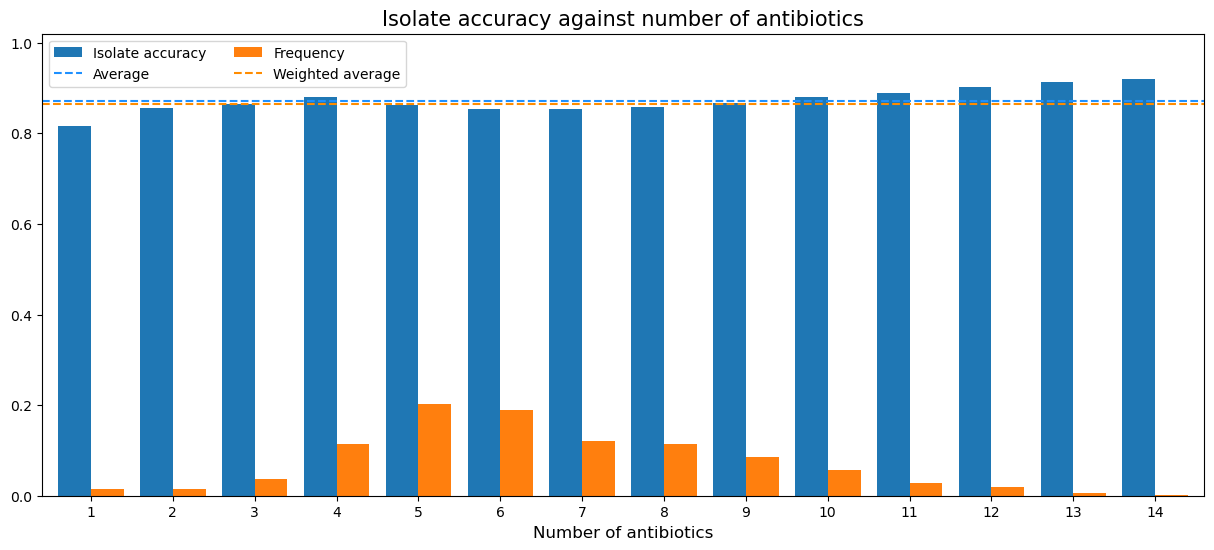

In [12]:
df_tmp = df_stats.groupby('num_ab').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp = df_tmp[df_tmp['count'] > 20]
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
avg_acc = df_tmp['accuracy'].mean()
ax.axhline(avg_acc, color='dodgerblue', linestyle='--', label='temp')
weighted_avg_acc = (df_tmp['accuracy'] * df_tmp['share']).sum()
ax.axhline(weighted_avg_acc, color='darkorange', linestyle='--', label='temp2')
ax.set_title('Isolate accuracy against number of antibiotics', fontsize=15)
ax.set_xlabel('Number of antibiotics', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
handles, tmp_labels = ax.get_legend_handles_labels()
tmp0 = handles[0]
tmp1 = handles[1]
handles[0] = handles[2]
handles[2] = handles[3]
handles[1] = tmp0
handles[3] = tmp1
labels=['Isolate accuracy', 'Average', 'Frequency', 'Weighted average']
ax.legend(handles, labels, loc='upper left', fontsize=10, ncol=2)
plt.show()

**Fig 2**: Compare correctly classified isolates for different number of masked tests

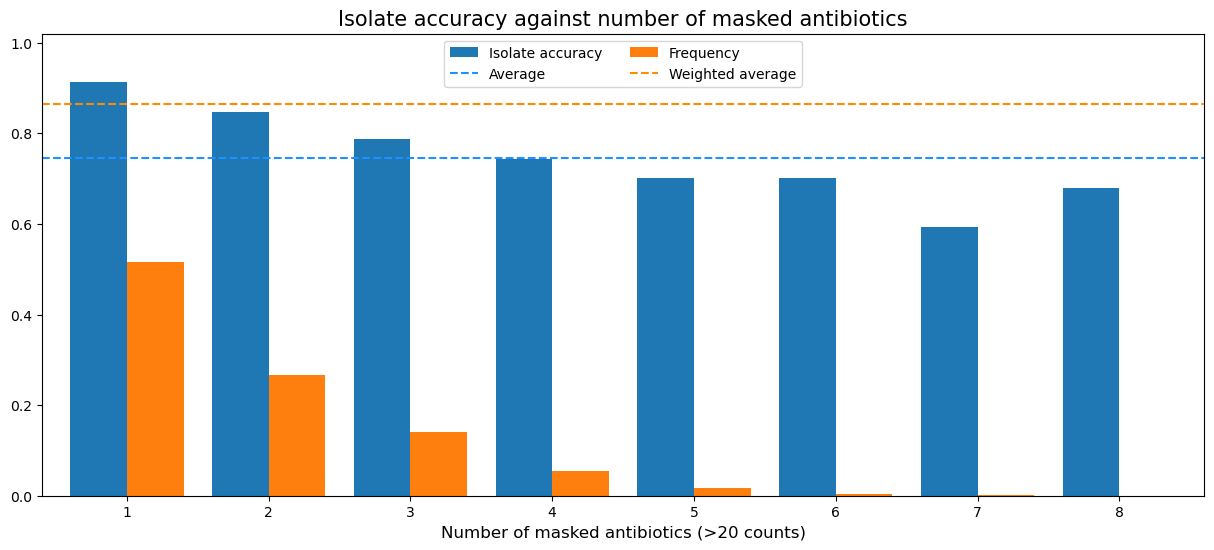

In [13]:
df_tmp = df_stats.groupby('num_masked').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp = df_tmp[df_tmp['count'] > 20]
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
avg_acc = df_tmp['accuracy'].mean()
ax.axhline(avg_acc, color='dodgerblue', linestyle='--', label='temp')
weighted_avg_acc = (df_tmp['accuracy'] * df_tmp['share']).sum()
ax.axhline(weighted_avg_acc, color='darkorange', linestyle='--', label='temp2')
ax.set_title('Isolate accuracy against number of masked antibiotics', fontsize=15)
ax.set_xlabel('Number of masked antibiotics (>20 counts)', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
handles, tmp_labels = ax.get_legend_handles_labels()
tmp0 = handles[0]
tmp1 = handles[1]
handles[0] = handles[2]
handles[2] = handles[3]
handles[1] = tmp0
handles[3] = tmp1
labels=['Isolate accuracy', 'Average', 'Frequency', 'Weighted average']
ax.legend(handles, labels, loc='upper center', fontsize=10, ncol=2)
plt.show()

Performance against *share* of antibiotics that are masked

C:\Users\jespe\AppData\Local\Temp\ipykernel_7576\1869263373.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tmp = df_tmp.groupby('frac_masked_bin').agg({'correct_all': ['mean', 'count']})
C:\Users\jespe\AppData\Local\Temp\ipykernel_7576\1869263373.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.1f} - {:.1f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])


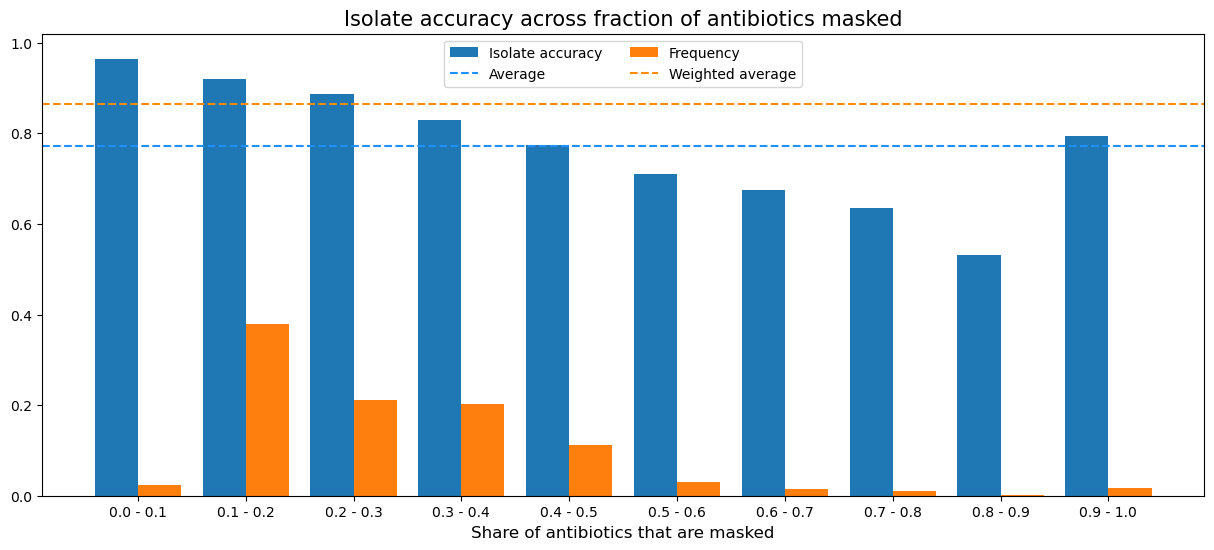

In [14]:
df_tmp = df_stats.copy()
df_tmp['frac_masked'] = df_tmp['num_masked'] / df_tmp['num_ab']
bins = np.linspace(0, 1, 11)
df_tmp['frac_masked_bin'] = pd.cut(df_tmp['frac_masked'], bins=bins)
df_tmp = df_tmp.groupby('frac_masked_bin').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
df_tmp.head(n=20)
# Extracting the bin edges for labeling the x-axis
bin_edges = df_tmp.index.astype(str).tolist()

fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(bin_edges, df_tmp['accuracy'], color='tab:blue', 
       width=-0.4, align='edge', label='Accuracy')
ax.bar(bin_edges, df_tmp['share'], color='tab:orange',
         width=0.4, align='edge', label='Count')
avg_acc = df_tmp['accuracy'].mean()
ax.axhline(avg_acc, color='dodgerblue', linestyle='--', label='temp')
weighted_avg_acc = (df_tmp['accuracy'] * df_tmp['share']).sum()
ax.axhline(weighted_avg_acc, color='darkorange', linestyle='--', label='temp2')
ax.set_ylim(0, 1.02)
ax.set_title('Isolate accuracy across fraction of antibiotics masked', fontsize=15)
ax.set_xlabel('Share of antibiotics that are masked', fontsize=12)
ax.set_xticklabels(['{:.1f} - {:.1f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])
handles, tmp_labels = ax.get_legend_handles_labels()
tmp0 = handles[0]
tmp1 = handles[1]
handles[0] = handles[2]
handles[2] = handles[3]
handles[1] = tmp0
handles[3] = tmp1
labels=['Isolate accuracy', 'Average', 'Frequency', 'Weighted average']
ax.legend(handles, labels, loc='upper center', fontsize=10, ncol=2)
plt.show()

**Fig 3**: Compare isolate accuracy against fraction of antibiotics that are resistant

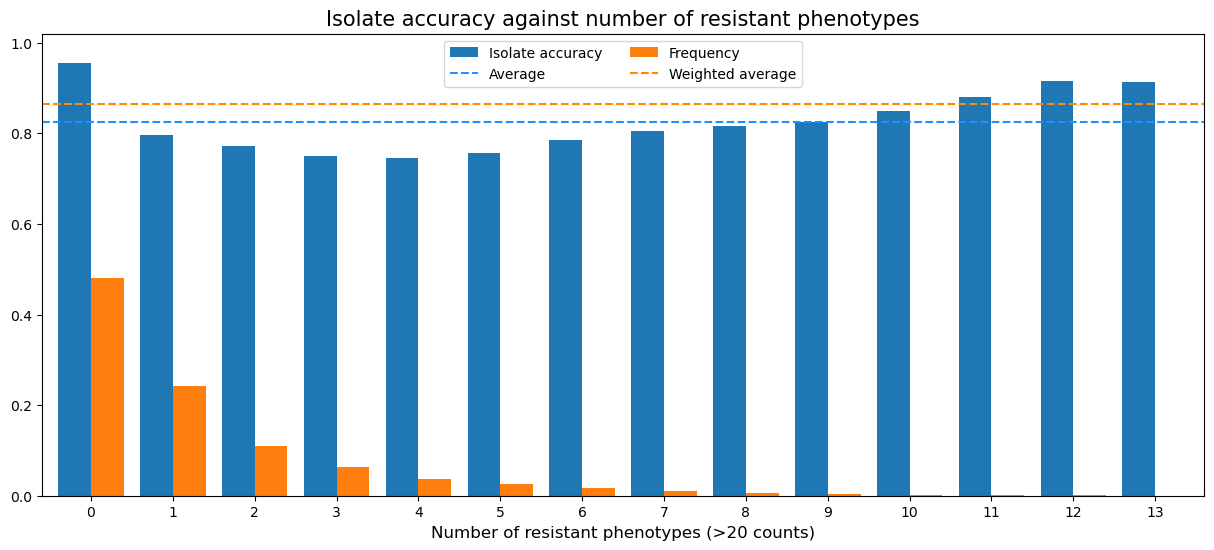

In [15]:
df_tmp = df_stats.groupby('num_R').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp = df_tmp[df_tmp['count'] > 20]
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
avg_acc = df_tmp['accuracy'].mean()
ax.axhline(avg_acc, color='dodgerblue', linestyle='--', label='temp')
weighted_avg_acc = (df_tmp['accuracy'] * df_tmp['share']).sum()
ax.axhline(weighted_avg_acc, color='darkorange', linestyle='--', label='temp2')
ax.set_title('Isolate accuracy against number of resistant phenotypes', fontsize=15)
ax.set_xlabel('Number of resistant phenotypes (>20 counts)', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
handles, tmp_labels = ax.get_legend_handles_labels()
tmp0 = handles[0]
tmp1 = handles[1]
handles[0] = handles[2]
handles[2] = handles[3]
handles[1] = tmp0
handles[3] = tmp1
labels=['Isolate accuracy', 'Average', 'Frequency', 'Weighted average']
ax.legend(handles, labels, loc='upper center', fontsize=10, ncol=2)
plt.show()

C:\Users\jespe\AppData\Local\Temp\ipykernel_7576\393325734.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tmp = df_tmp.groupby('frac_R_bin').agg({'correct_all': ['mean', 'count']})
C:\Users\jespe\AppData\Local\Temp\ipykernel_7576\393325734.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.1f} - {:.1f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])


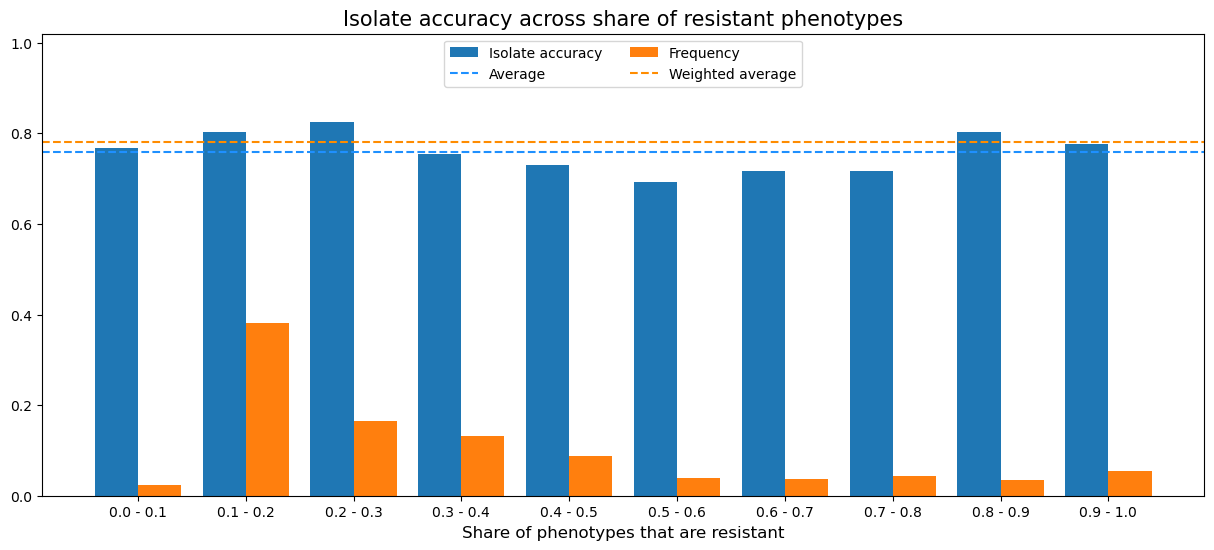

In [16]:
df_tmp = df_stats.copy()
df_tmp['frac_R'] = df_tmp['num_R'] / df_tmp['num_ab']
bins = np.linspace(0, 1, 11)
df_tmp['frac_R_bin'] = pd.cut(df_tmp['frac_R'], bins=bins)
df_tmp = df_tmp.groupby('frac_R_bin').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
df_tmp.head(n=20)
# Extracting the bin edges for labeling the x-axis
bin_edges = df_tmp.index.astype(str).tolist()

fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(bin_edges, df_tmp['accuracy'], color='tab:blue', 
       width=-0.4, align='edge', label='Accuracy')
ax.bar(bin_edges, df_tmp['share'], color='tab:orange',
         width=0.4, align='edge', label='Count')
avg_acc = df_tmp['accuracy'].mean()
ax.axhline(avg_acc, color='dodgerblue', linestyle='--', label='temp')
weighted_avg_acc = (df_tmp['accuracy'] * df_tmp['share']).sum()
ax.axhline(weighted_avg_acc, color='darkorange', linestyle='--', label='temp2')
ax.set_ylim(0, 1.02)
ax.set_title('Isolate accuracy across share of resistant phenotypes', fontsize=15)
ax.set_xlabel('Share of phenotypes that are resistant', fontsize=12)
ax.set_xticklabels(['{:.1f} - {:.1f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])
handles, tmp_labels = ax.get_legend_handles_labels()
tmp0 = handles[0]
tmp1 = handles[1]
handles[0] = handles[2]
handles[2] = handles[3]
handles[1] = tmp0
handles[3] = tmp1
labels=['Isolate accuracy', 'Average', 'Frequency', 'Weighted average']
ax.legend(handles, labels, loc='upper center', fontsize=10, ncol=2)
plt.show()

**Fig 4**: Isolate accuracy across countries

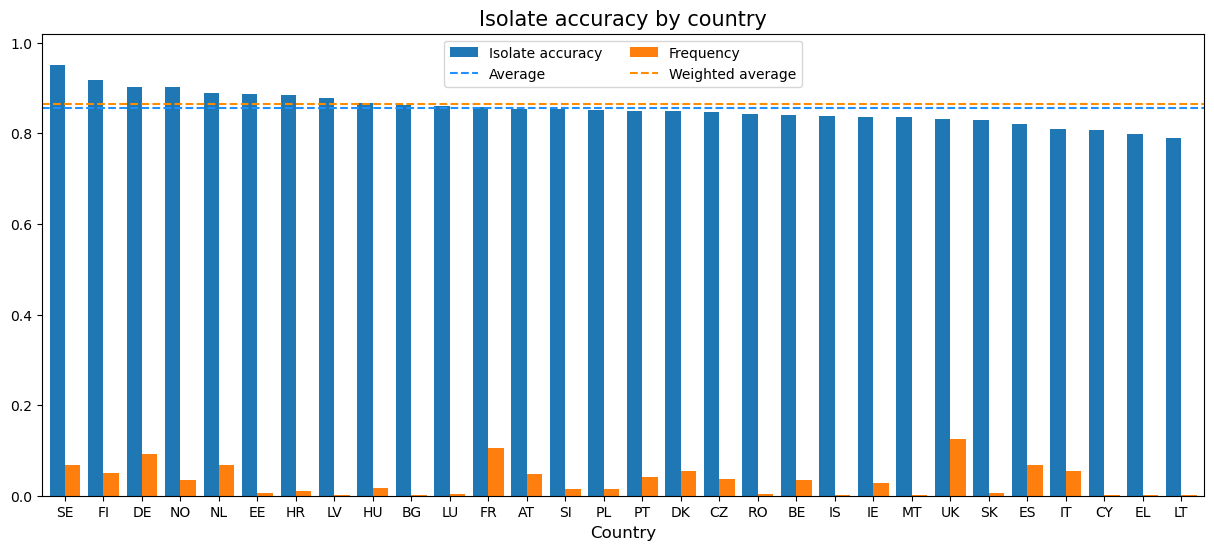

In [17]:
df_tmp = df_stats.groupby('country').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp.sort_values(by='accuracy', ascending=False, inplace=True)
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
avg_acc = df_tmp['accuracy'].mean()
ax.axhline(avg_acc, color='dodgerblue', linestyle='--', label='temp')
weighted_avg_acc = (df_tmp['accuracy'] * df_tmp['share']).sum()
ax.axhline(weighted_avg_acc, color='darkorange', linestyle='--', label='temp2')
ax.set_title('Isolate accuracy by country', fontsize=15)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
handles, tmp_labels = ax.get_legend_handles_labels()
tmp0 = handles[0]
tmp1 = handles[1]
handles[0] = handles[2]
handles[2] = handles[3]
handles[1] = tmp0
handles[3] = tmp1
labels=['Isolate accuracy', 'Average', 'Frequency', 'Weighted average']
ax.legend(handles, labels, loc='upper center', fontsize=10, ncol=2)
plt.show()

**Fig 6**: Isolate accuracies by age

                accuracy  count     share
age_bin                                  
(0.0, 10.0]     0.851718   1106  0.005212
(10.0, 20.0]    0.862579   1892  0.008917
(20.0, 30.0]    0.859884   4325  0.020383
(30.0, 40.0]    0.858868   6044  0.028484
(40.0, 50.0]    0.858482  10458  0.049286
(50.0, 60.0]    0.860549  22438  0.105745
(60.0, 70.0]    0.861098  40129  0.189118
(70.0, 80.0]    0.865865  59388  0.279881
(80.0, 90.0]    0.866304  54706  0.257816
(90.0, 100.0]   0.865048  11530  0.054338
(100.0, 110.0]  0.889610    154  0.000726
(110.0, 120.0]  0.800000     20  0.000094


C:\Users\jespe\AppData\Local\Temp\ipykernel_7576\1049993875.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tmp = df_tmp.groupby('age_bin').agg({'correct_all': ['mean', 'count']})
C:\Users\jespe\AppData\Local\Temp\ipykernel_7576\1049993875.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0f} - {:.0f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])


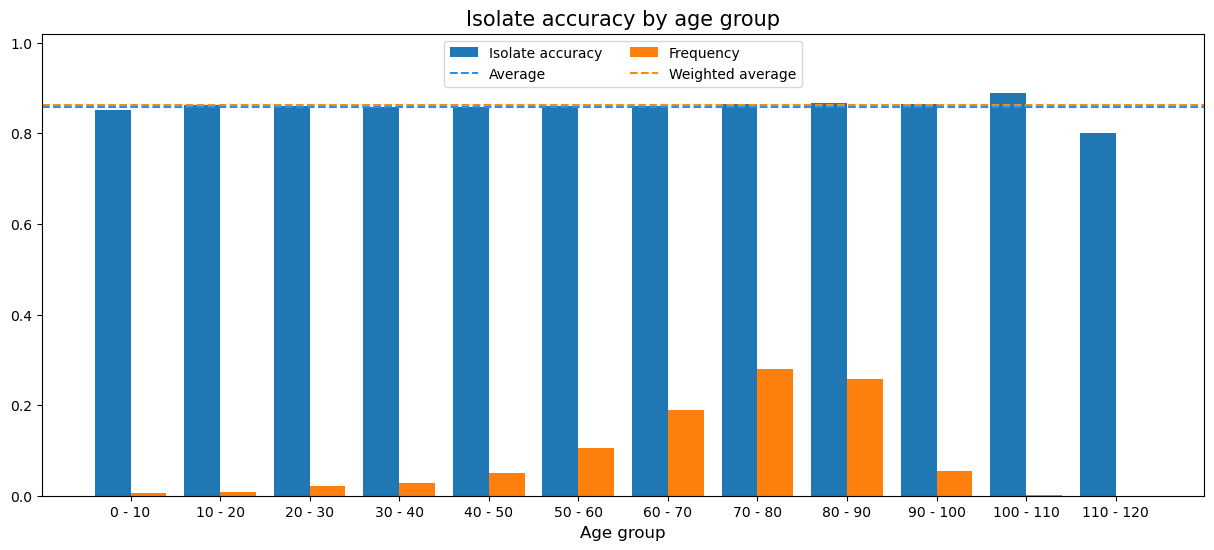

In [18]:
df_tmp = df_stats.copy()
bins = np.arange(0, df_tmp['age'].max() + 10, 10)
df_tmp['age_bin'] = pd.cut(df_tmp['age'], bins=bins)
df_tmp = df_tmp.groupby('age_bin').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
print(df_tmp.head(n=20))
# Extracting the bin edges for labeling the x-axis
bin_edges = df_tmp.index.astype(str).tolist()

fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(bin_edges, df_tmp['accuracy'], color='tab:blue', 
       width=-0.4, align='edge', label='Accuracy')
ax.bar(bin_edges, df_tmp['share'], color='tab:orange',
         width=0.4, align='edge', label='Count')
avg_acc = df_tmp['accuracy'].mean()
ax.axhline(avg_acc, color='dodgerblue', linestyle='--', label='temp')
weighted_avg_acc = (df_tmp['accuracy'] * df_tmp['share']).sum()
ax.axhline(weighted_avg_acc, color='darkorange', linestyle='--', label='temp2')
ax.set_ylim(0, 1.02)
ax.set_title('Isolate accuracy by age group', fontsize=15)
ax.set_xlabel('Age group', fontsize=12)
ax.set_xticklabels(['{:.0f} - {:.0f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])
handles, tmp_labels = ax.get_legend_handles_labels()
tmp0 = handles[0]
tmp1 = handles[1]
handles[0] = handles[2]
handles[2] = handles[3]
handles[1] = tmp0
handles[3] = tmp1
labels=['Isolate accuracy', 'Average', 'Frequency', 'Weighted average']
ax.legend(handles, labels, loc='upper center', fontsize=10, ncol=2)
plt.show()

**Fig 6**: Isolate accuracies by gender

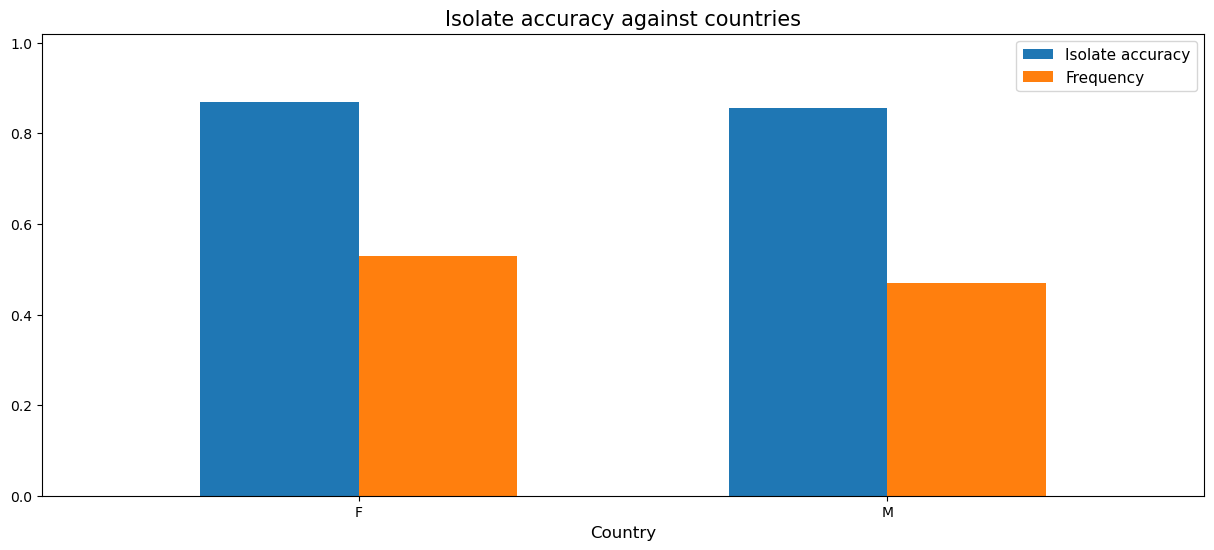

In [19]:
df_tmp = df_stats.groupby('gender').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp.sort_values(by='accuracy', ascending=False, inplace=True)
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.3, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.3, align='edge', color=['tab:orange'], ax=ax
)
ax.set_title('Isolate accuracy against countries', fontsize=15)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
handles, tmp_labels = ax.get_legend_handles_labels()
labels=['Isolate accuracy', 'Frequency',]
ax.legend(handles, labels, loc='upper right', fontsize=11)
plt.show()

### Based on masking from 4 known antibiotics

In [20]:
run_name = 'analysis_run_nknown'
results_dir = os.path.join(BASE_DIR, 'results', 'pheno', run_name)
ab_stats = pd.read_csv(os.path.join(results_dir, 'ab_stats.csv'))
ab_stats.set_index('antibiotic', inplace=True)
iso_stats = pd.read_csv(os.path.join(results_dir, 'iso_stats.csv'))

In [21]:
ab_stats

,num_tot,num_S,num_R,num_pred_S,num_pred_R,num_correct,num_correct_S,num_correct_R,accuracy,sensitivity,specificity,precision,F1
antibiotic,,,,,,,,,,,,,
AMP,49820,22008,27812,28298,21522,36488,18487,18001,0.732397,0.647239,0.840013,0.836400,0.729760
CTX,62352,55774,6578,56795,5557,60431,55324,5107,0.969191,0.776376,0.991932,0.919021,0.841698
GEN,66525,60913,5612,62691,3834,61967,59523,2444,0.931484,0.435495,0.977181,0.637454,0.517468
TOB,39085,35456,3629,36261,2824,37218,34925,2293,0.952232,0.631855,0.985024,0.811969,0.710677
CIP,68781,54393,14388,58493,10288,61593,52849,8744,0.895494,0.607729,0.971614,0.849922,0.708705
CAZ,66500,60715,5785,61036,5464,64753,60002,4751,0.973729,0.821262,0.988257,0.869510,0.844697
CRO,23717,21354,2363,21562,2155,23149,21174,1975,0.976051,0.835802,0.991571,0.916473,0.874281
OFX,9722,7941,1781,8290,1432,9165,7837,1328,0.942707,0.745649,0.986903,0.927374,0.826642
AMX,21306,9988,11318,12855,8451,15971,8754,7217,0.749601,0.637657,0.876452,0.853982,0.730133


**Fig 1**: Compare the accuracy of each antibiotic to the data imbalance

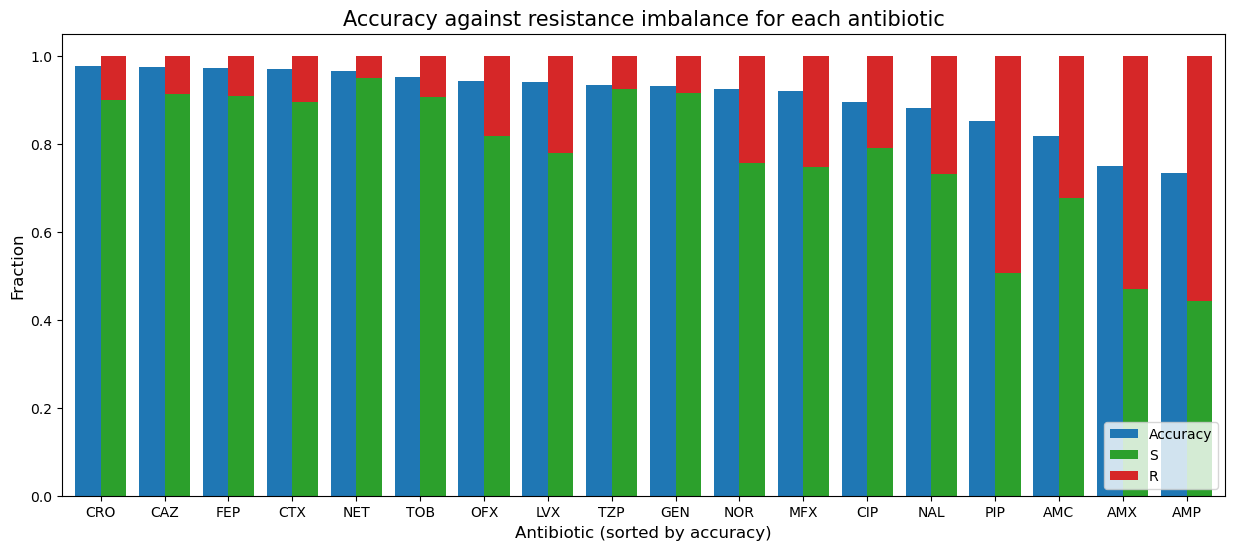

In [22]:
sorted_ab_stats = ab_stats.sort_values(by='accuracy', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']

fig, ax = plt.subplots(figsize=(15, 6))
bar1 = sorted_ab_stats['accuracy'].plot.bar(rot=0, width=-0.4, align='edge', color='tab:blue', ax=ax)
bar2 = sorted_ab_stats[['S_frac', 'R_frac']].plot.bar(
    rot=0, stacked=True, width=0.4, align='edge', color=['tab:green', 'tab:red'], ax=ax
)
ax.set_title('Accuracy against resistance imbalance for each antibiotic', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by accuracy)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.legend(labels=['Accuracy', 'S', 'R'], loc='lower right')   
plt.show()

**Fig 2**: Comparing distributions of predictions to true distributions

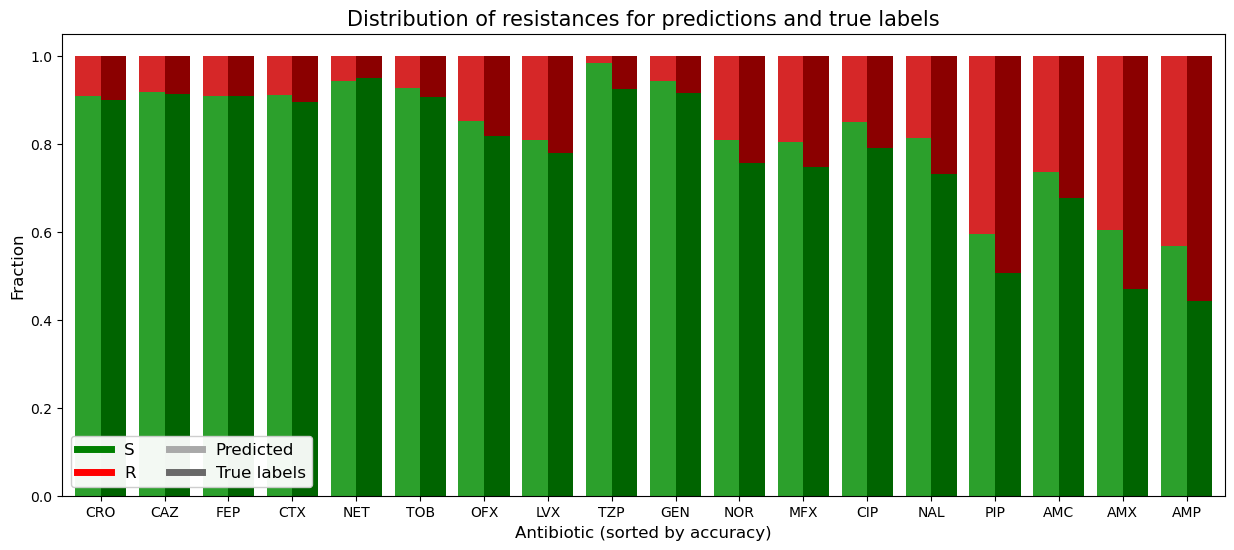

In [23]:
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

fig, ax = plt.subplots(figsize=(15, 6))
bar_pred = sorted_ab_stats[['S_frac_pred', 'R_frac_pred']].plot.bar(
    rot=0, stacked=True, width=-0.4, align='edge', color=['tab:green', 'tab:red'], ax=ax
)
bar_true = sorted_ab_stats[['S_frac', 'R_frac']].plot.bar(
    rot=0, stacked=True, width=0.4, align='edge', color=['darkgreen', 'darkred'], ax=ax
)
ax.set_title('Distribution of resistances for predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by accuracy)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)

from matplotlib.lines import Line2D

S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
ax.legend([S_line, R_line, pred_line, true_line], 
          ['S', 'R', 'Predicted', 'True labels'], 
          loc='lower left', ncol=2, fontsize=12, framealpha=0.95
)
plt.show()

**Fig 3**: Combining Fig 1 and Fig 2 into one plot

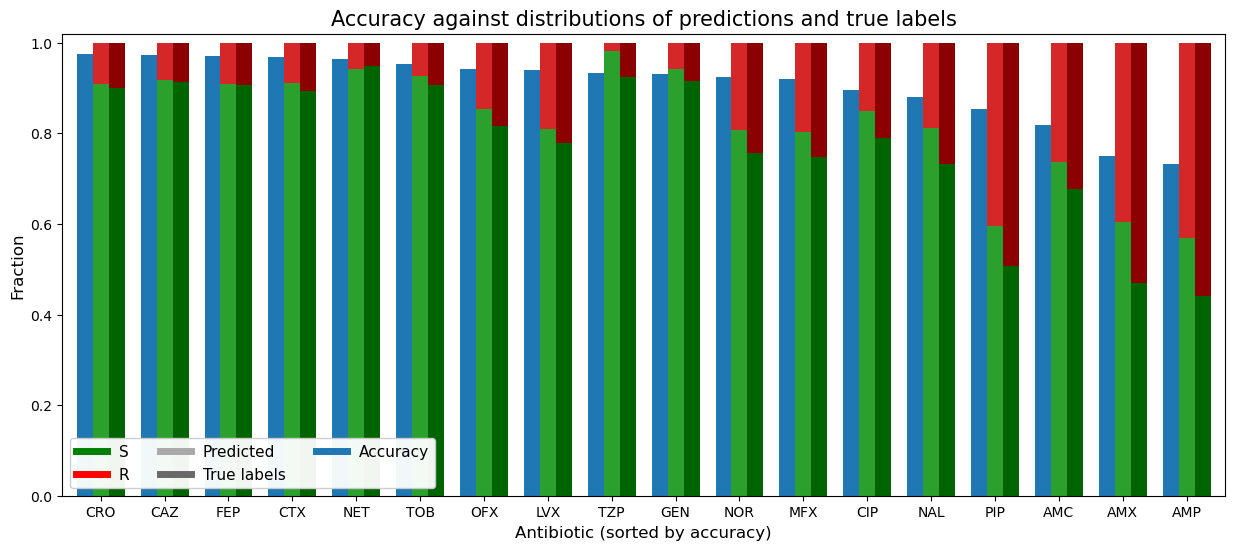

In [24]:
sorted_ab_stats = ab_stats.sort_values(by='accuracy', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(15, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['accuracy'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('Accuracy against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by accuracy)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'Accuracy'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

The same for sensitivity - ability to capture all *resistant* cases

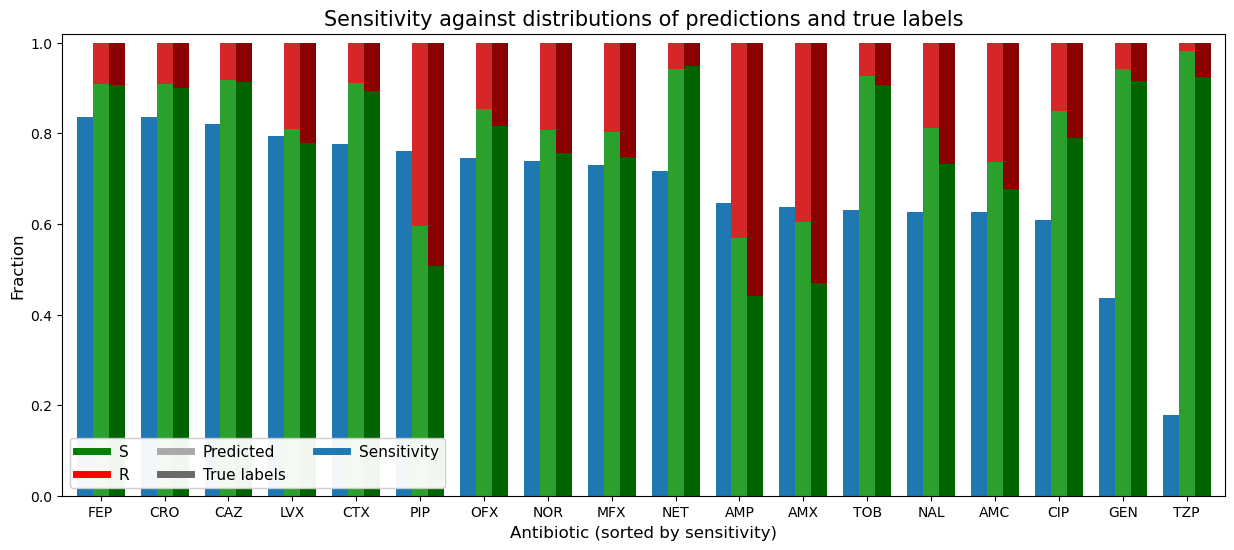

In [25]:
sorted_ab_stats = ab_stats.sort_values(by='sensitivity', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(15, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['sensitivity'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('Sensitivity against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by sensitivity)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'Sensitivity'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

The same for specificity - ability to capture all *sensitive* cases

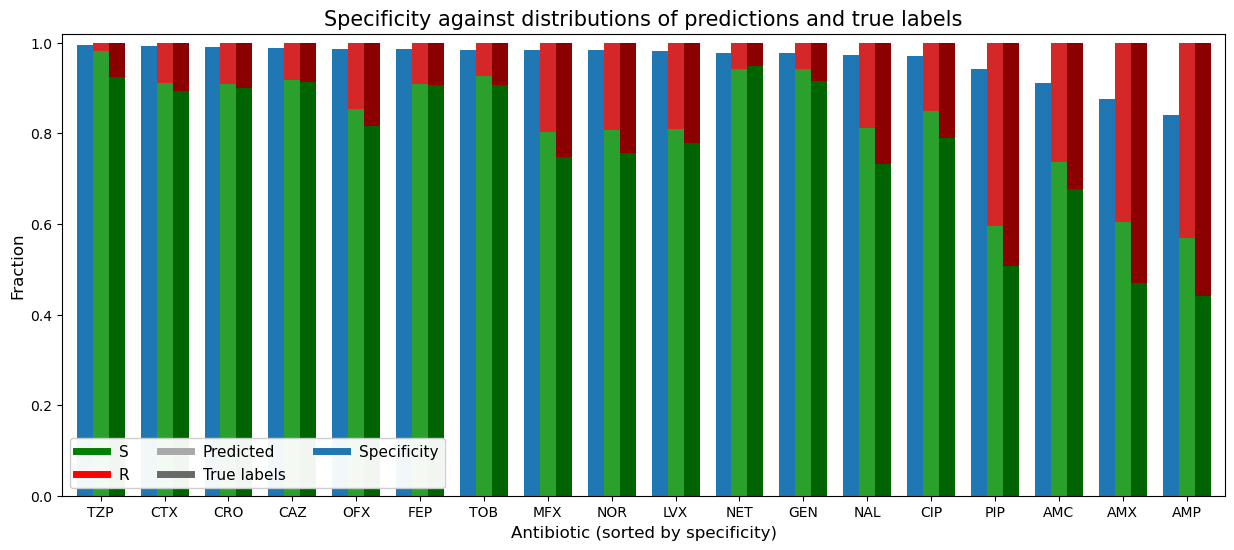

In [26]:
sorted_ab_stats = ab_stats.sort_values(by='specificity', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(15, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['specificity'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('Specificity against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by specificity)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'Specificity'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

Now F1 score

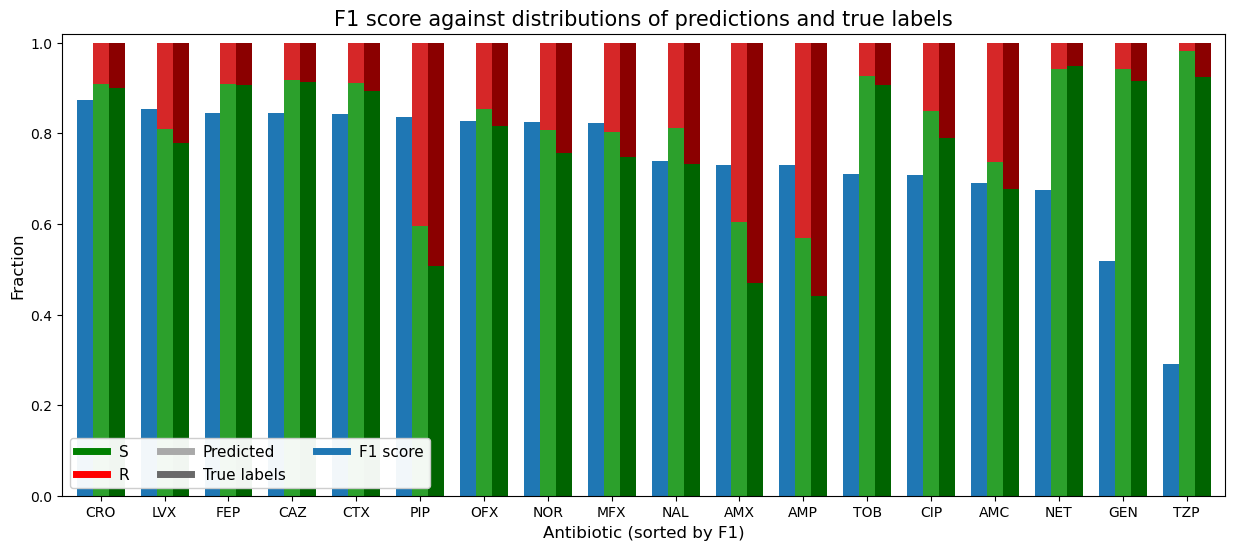

In [27]:
sorted_ab_stats = ab_stats.sort_values(by='F1', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(15, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['F1'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('F1 score against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by F1)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'F1 score'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

#### Isolate stats

In [28]:
df_stats = iso_stats.copy()

**Fig 1**: Compare correctly classified isolates for different sequence lengths

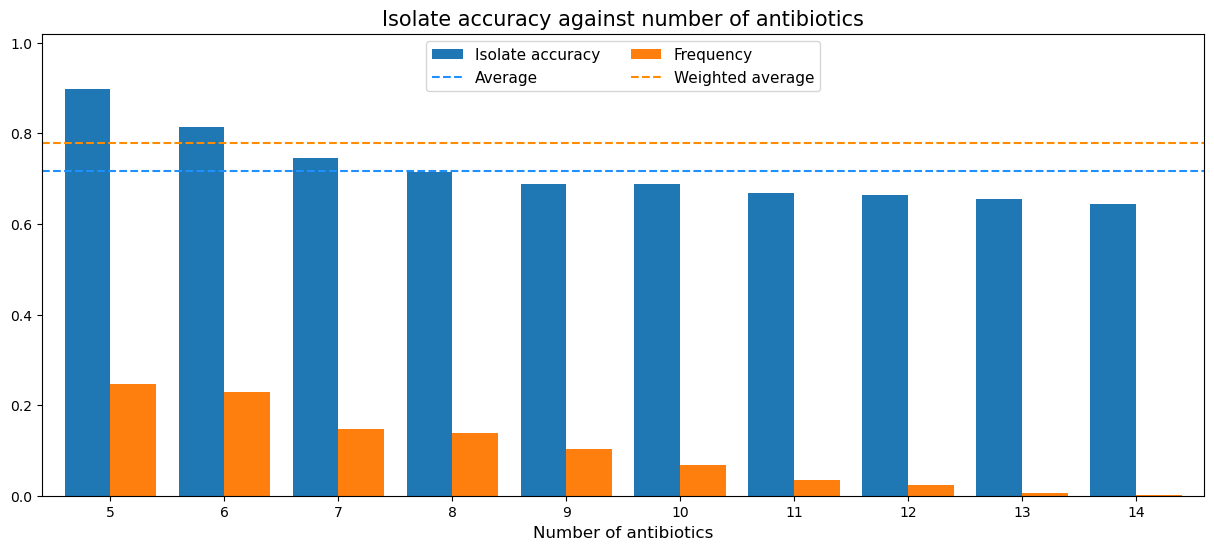

In [29]:
df_tmp = df_stats.groupby('num_ab').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp = df_tmp[df_tmp['count'] > 20]
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
avg_acc = df_tmp['accuracy'].mean()
ax.axhline(avg_acc, color='dodgerblue', linestyle='--', label='temp')
weighted_avg_acc = (df_tmp['accuracy'] * df_tmp['share']).sum()
ax.axhline(weighted_avg_acc, color='darkorange', linestyle='--', label='temp2')
ax.set_title('Isolate accuracy against number of antibiotics', fontsize=15)
ax.set_xlabel('Number of antibiotics', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
handles, tmp_labels = ax.get_legend_handles_labels()
tmp0 = handles[0]
tmp1 = handles[1]
handles[0] = handles[2]
handles[2] = handles[3]
handles[1] = tmp0
handles[3] = tmp1
labels=['Isolate accuracy', 'Average', 'Frequency', 'Weighted average']
ax.legend(handles, labels, loc='upper center', fontsize=11, ncol=2)
plt.show()

**Fig 2**: Compare correctly classified isolates for different number of masked tests

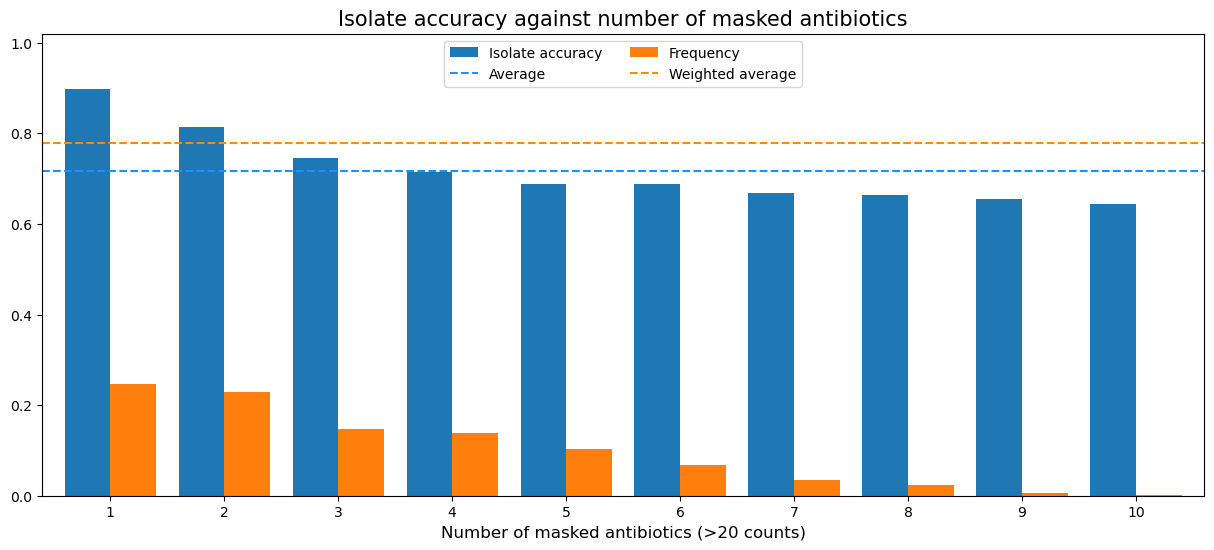

In [30]:
df_tmp = df_stats.groupby('num_masked').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp = df_tmp[df_tmp['count'] > 20]
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
avg_acc = df_tmp['accuracy'].mean()
ax.axhline(avg_acc, color='dodgerblue', linestyle='--', label='temp')
weighted_avg_acc = (df_tmp['accuracy'] * df_tmp['share']).sum()
ax.axhline(weighted_avg_acc, color='darkorange', linestyle='--', label='temp2')
ax.set_title('Isolate accuracy against number of masked antibiotics', fontsize=15)
ax.set_xlabel('Number of masked antibiotics (>20 counts)', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
handles, tmp_labels = ax.get_legend_handles_labels()
tmp0 = handles[0]
tmp1 = handles[1]
handles[0] = handles[2]
handles[2] = handles[3]
handles[1] = tmp0
handles[3] = tmp1
labels=['Isolate accuracy', 'Average', 'Frequency', 'Weighted average']
ax.legend(handles, labels, loc='upper center', fontsize=10, ncol=2)
plt.show()

**Fig 3**: Compare isolate accuracy against fraction of antibiotics that are resistant

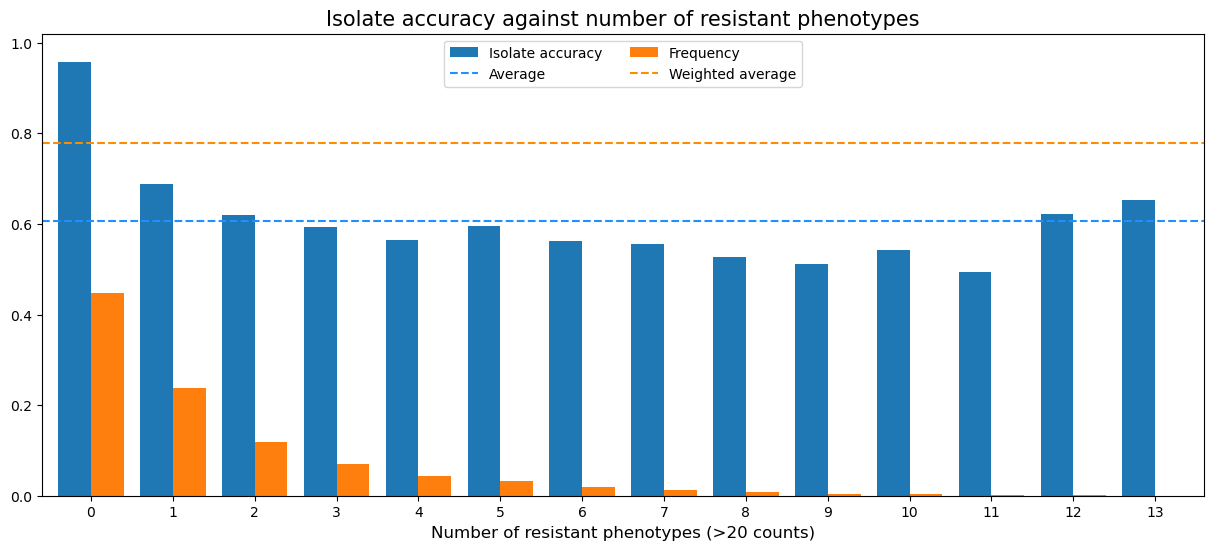

In [31]:
df_tmp = df_stats.groupby('num_R').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp = df_tmp[df_tmp['count'] > 20]
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
avg_acc = df_tmp['accuracy'].mean()
ax.axhline(avg_acc, color='dodgerblue', linestyle='--', label='temp')
weighted_avg_acc = (df_tmp['accuracy'] * df_tmp['share']).sum()
ax.axhline(weighted_avg_acc, color='darkorange', linestyle='--', label='temp2')
ax.set_title('Isolate accuracy against number of resistant phenotypes', fontsize=15)
ax.set_xlabel('Number of resistant phenotypes (>20 counts)', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
handles, tmp_labels = ax.get_legend_handles_labels()
tmp0 = handles[0]
tmp1 = handles[1]
handles[0] = handles[2]
handles[2] = handles[3]
handles[1] = tmp0
handles[3] = tmp1
labels=['Isolate accuracy', 'Average', 'Frequency', 'Weighted average']
ax.legend(handles, labels, loc='upper center', fontsize=10, ncol=2)
plt.show()

C:\Users\jespe\AppData\Local\Temp\ipykernel_7576\393325734.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tmp = df_tmp.groupby('frac_R_bin').agg({'correct_all': ['mean', 'count']})
C:\Users\jespe\AppData\Local\Temp\ipykernel_7576\393325734.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.1f} - {:.1f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])


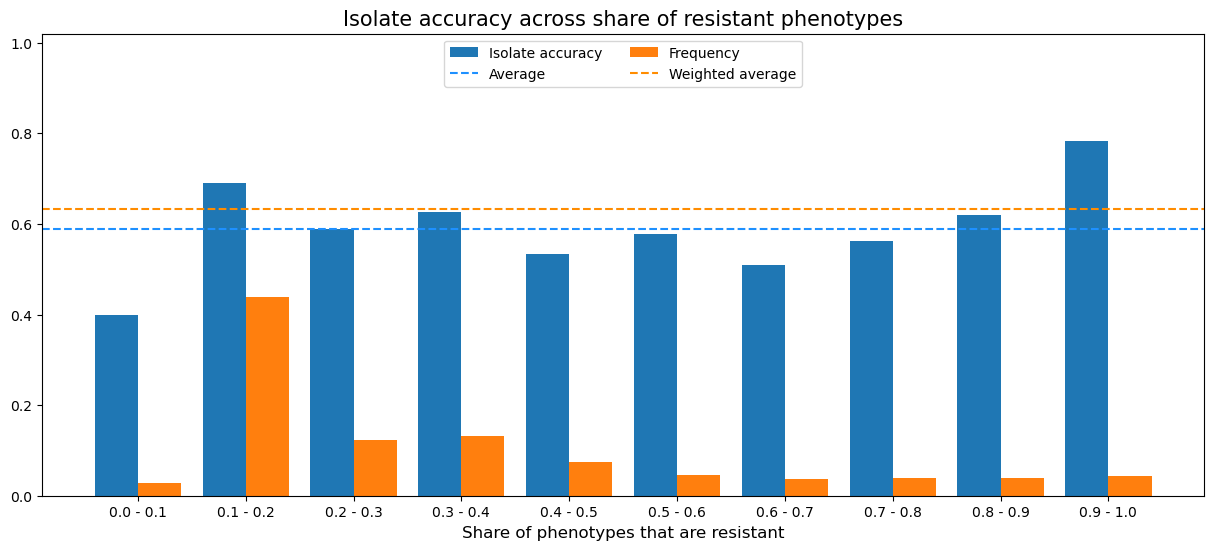

In [32]:
df_tmp = df_stats.copy()
df_tmp['frac_R'] = df_tmp['num_R'] / df_tmp['num_ab']
bins = np.linspace(0, 1, 11)
df_tmp['frac_R_bin'] = pd.cut(df_tmp['frac_R'], bins=bins)
df_tmp = df_tmp.groupby('frac_R_bin').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
df_tmp.head(n=20)
# Extracting the bin edges for labeling the x-axis
bin_edges = df_tmp.index.astype(str).tolist()

fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(bin_edges, df_tmp['accuracy'], color='tab:blue', 
       width=-0.4, align='edge', label='Accuracy')
ax.bar(bin_edges, df_tmp['share'], color='tab:orange',
         width=0.4, align='edge', label='Count')
avg_acc = df_tmp['accuracy'].mean()
ax.axhline(avg_acc, color='dodgerblue', linestyle='--', label='temp')
weighted_avg_acc = (df_tmp['accuracy'] * df_tmp['share']).sum()
ax.axhline(weighted_avg_acc, color='darkorange', linestyle='--', label='temp2')
ax.set_ylim(0, 1.02)
ax.set_title('Isolate accuracy across share of resistant phenotypes', fontsize=15)
ax.set_xlabel('Share of phenotypes that are resistant', fontsize=12)
ax.set_xticklabels(['{:.1f} - {:.1f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])
handles, tmp_labels = ax.get_legend_handles_labels()
tmp0 = handles[0]
tmp1 = handles[1]
handles[0] = handles[2]
handles[2] = handles[3]
handles[1] = tmp0
handles[3] = tmp1
labels=['Isolate accuracy', 'Average', 'Frequency', 'Weighted average']
ax.legend(handles, labels, loc='upper center', fontsize=10, ncol=2)
plt.show()

### Compare masking methods

In [33]:
run_name = 'analysis_run'
results_dir = os.path.join(BASE_DIR, 'results', 'pheno', run_name)
ab_stats_random = pd.read_csv(os.path.join(results_dir, 'ab_stats.csv'))
ab_stats_random.set_index('antibiotic', inplace=True)
iso_stats_random = pd.read_csv(os.path.join(results_dir, 'iso_stats.csv'))
run_name = 'analysis_run_nknown'
results_dir = os.path.join(BASE_DIR, 'results', 'pheno', run_name)
ab_stats_nknown = pd.read_csv(os.path.join(results_dir, 'ab_stats.csv'))
ab_stats_nknown.set_index('antibiotic', inplace=True)
iso_stats_nknown = pd.read_csv(os.path.join(results_dir, 'iso_stats.csv'))

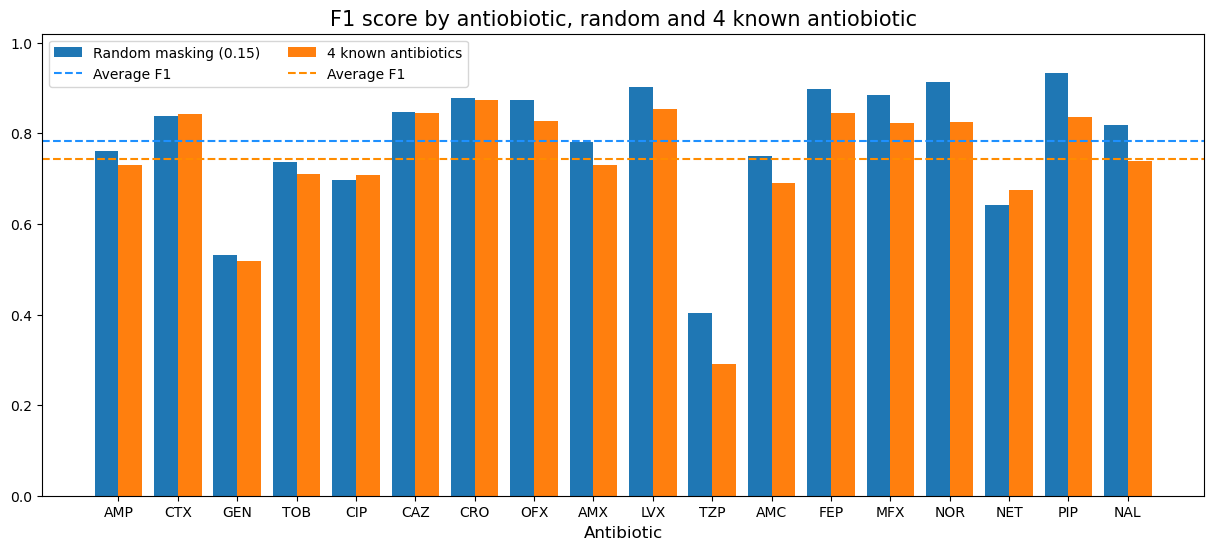

In [34]:
bin_edges = ab_stats_random.index.astype(str).tolist()

fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(bin_edges, ab_stats_random['F1'], color='tab:blue', width=-0.4, align='edge', label='Accuracy')
ax.bar(bin_edges, ab_stats_nknown['F1'], color='tab:orange', width=0.4, align='edge', label='Count')
avg_random = ab_stats_random['F1'].mean()
avg_nknown = ab_stats_nknown['F1'].mean()
ax.axhline(avg_random, color='dodgerblue', linestyle='--', label='temp')
ax.axhline(avg_nknown, color='darkorange', linestyle='--', label='temp2')
ax.set_title('F1 score by antiobiotic, random and 4 known antiobiotic', fontsize=15)
ax.set_xlabel('Antibiotic', fontsize=12)
ax.set_ylim(0, 1.02)
handles, tmp_labels = ax.get_legend_handles_labels()
tmp0 = handles[0]
tmp1 = handles[1]
handles[0] = handles[2]
handles[2] = handles[3]
handles[1] = tmp0
handles[3] = tmp1
labels=['Random masking (0.15)', 'Average F1', '4 known antibiotics', 'Average F1']
ax.legend(handles, labels, loc='upper left', fontsize=10, ncol=2)
plt.show()

Compare average metrics

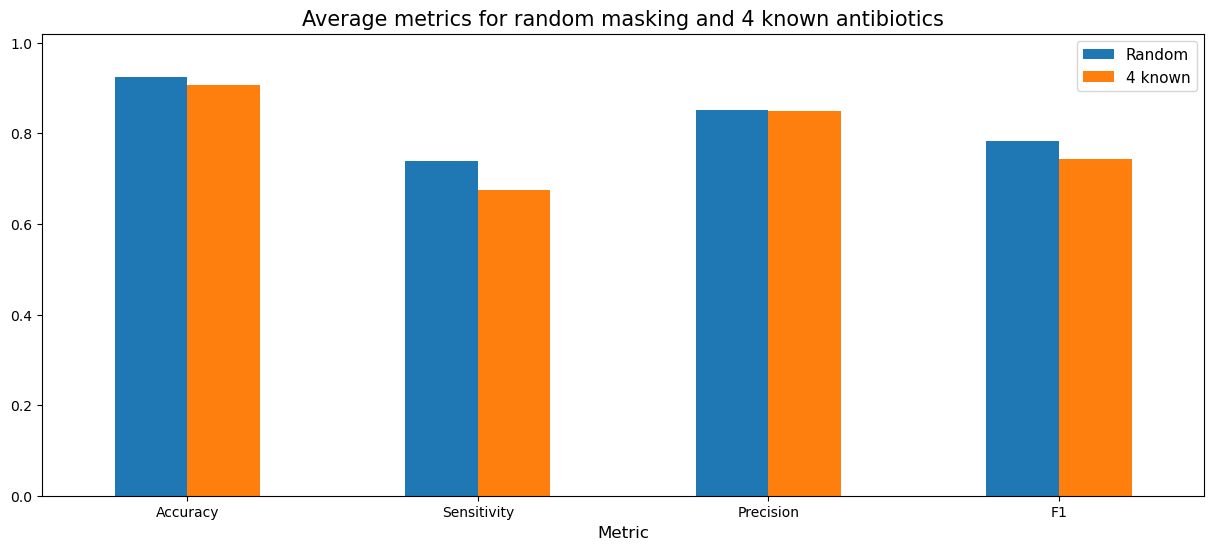

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))

df_metrics = pd.DataFrame({
    'metric': ['Accuracy', 'Sensitivity', 'Precision', 'F1'],
    'random': [ab_stats_random['accuracy'].mean(), ab_stats_random['sensitivity'].mean(),
                ab_stats_random['precision'].mean(), ab_stats_random['F1'].mean()],
    '4_known': [ab_stats_nknown['accuracy'].mean(), ab_stats_nknown['sensitivity'].mean(),
                ab_stats_nknown['precision'].mean(), ab_stats_nknown['F1'].mean()]
})
df_metrics.set_index('metric', inplace=True)
df_metrics.plot.bar(rot=0, ax=ax)
ax.set_title('Average metrics for random masking and 4 known antibiotics', fontsize=15)
ax.set_xlabel('Metric', fontsize=12)
ax.set_ylim(0, 1.02)
ax.legend(labels = ['Random', '4 known'],loc='upper right', fontsize=11)
plt.show()

Compare against fraction masked

## Unimodal Genotype Model

In [36]:
run_name = 'analysis_run'
results_dir = os.path.join(BASE_DIR, 'results', 'geno', run_name)
iso_stats = pd.read_csv(os.path.join(results_dir, 'iso_stats.csv'))

In [37]:
df_stats = iso_stats.copy()

In [38]:
df_stats.head(n=10)

,year,country,genotypes,num_genotypes,num_point_mutations,num_masked,num_correct,correct_all
0,2018.0,Thailand,"[""aph(3'')-Ib"", 'tet(A)', 'sul3', 'qnrS1', 'mc...",9,0,3,1,False
1,2005.0,USA,"['glpT_E448K=POINT', 'pmrB_Y358N=POINT']",2,2,1,1,True
2,NaN,Tanzania,"['aph(6)-Id', ""aph(3'')-Ib"", 'tet(A)', 'blaTEM...",6,0,2,2,True
3,NaN,United Kingdom,"['aac(3)-IIe', ""aac(6')-Ib-cr5"", 'gyrA_S83L=PO...",13,3,3,3,True
4,2020.0,USA,"['parE_I529L=POINT', 'parC_S80I=POINT', 'gyrA_...",14,9,1,1,True
5,2017.0,Canada,"['aac(3)-IIe', 'parE_I529L=POINT', ""aac(6')-Ib...",22,9,2,2,True
6,1999.0,USA,['glpT_E448K=POINT'],1,1,1,1,True
7,NaN,NaN,"['erm(B)', 'sat2', 'dfrA1', 'gyrA_D87G=POINT',...",16,4,4,4,True
8,2012.0,Netherlands,"['mcr-1.1', 'gyrA_S83L=POINT', 'tet(A)', 'sul2...",6,1,1,1,True
9,1997.0,France,['glpT_E448K=POINT'],1,1,1,1,True


**Fig 1**: Accuracy against number of genotypes

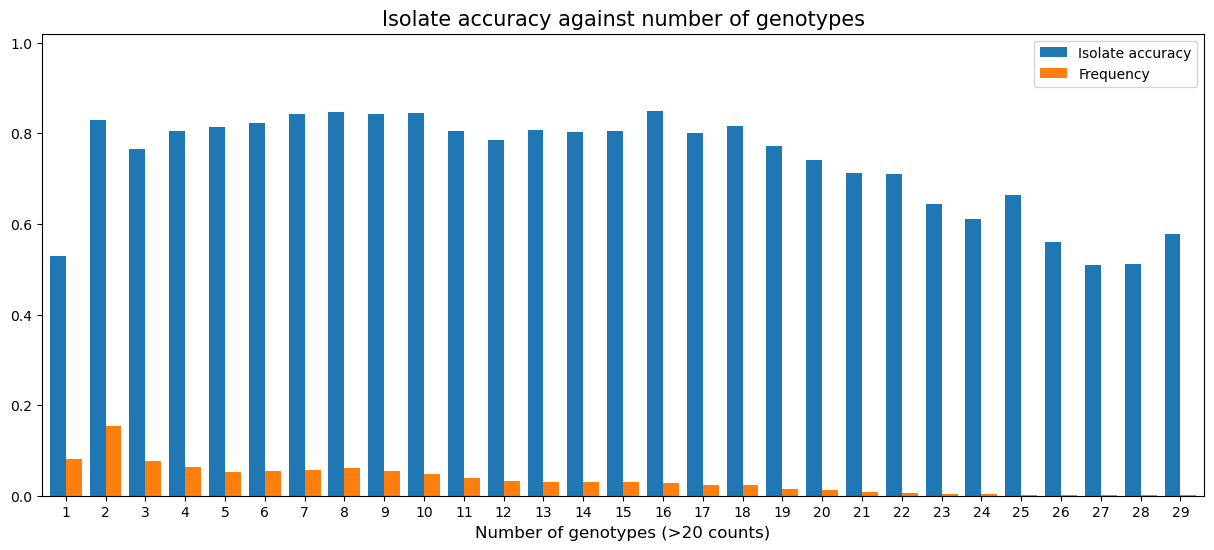

In [39]:
df_tmp = df_stats.groupby('num_genotypes').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp = df_tmp[df_tmp['count'] > 20]
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
ax.set_title('Isolate accuracy against number of genotypes', fontsize=15)
ax.set_xlabel('Number of genotypes (>20 counts)', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
ax.legend(labels=['Isolate accuracy', 'Frequency'], loc='upper right', fontsize=10)
plt.show()

**Fig 2**: Isolate accuracy against the number of masked genotypes

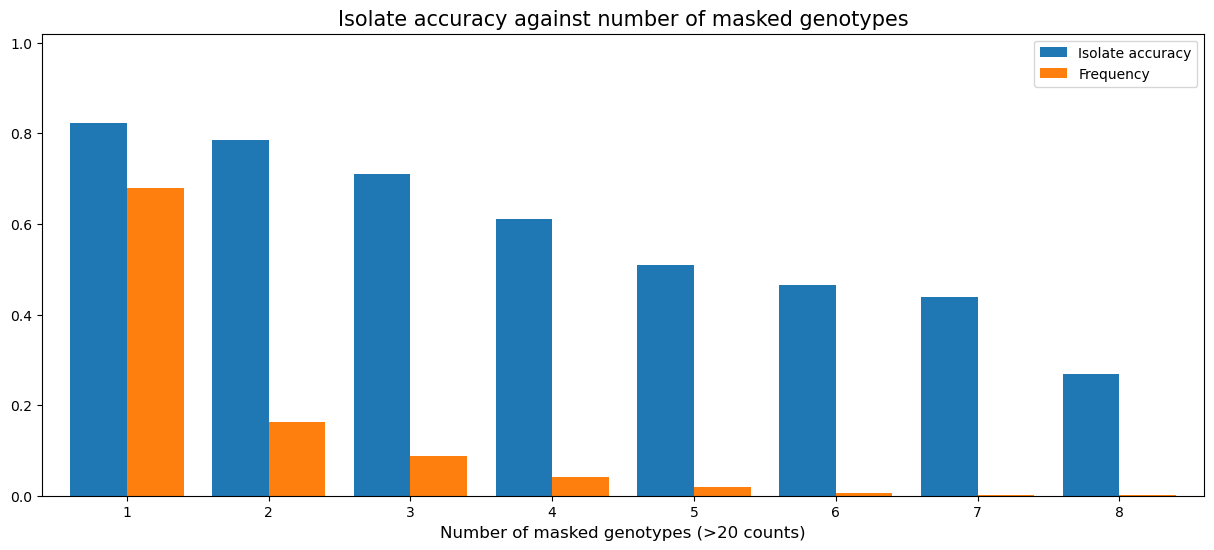

In [40]:
df_tmp = df_stats.groupby('num_masked').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp = df_tmp[df_tmp['count'] > 20]
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
ax.set_title('Isolate accuracy against number of masked genotypes', fontsize=15)
ax.set_xlabel('Number of masked genotypes (>20 counts)', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
ax.legend(labels=['Isolate accuracy', 'Frequency'], loc='upper right', fontsize=10)
plt.show()

**Fig 3**: Isolate accuracy for the most common countries

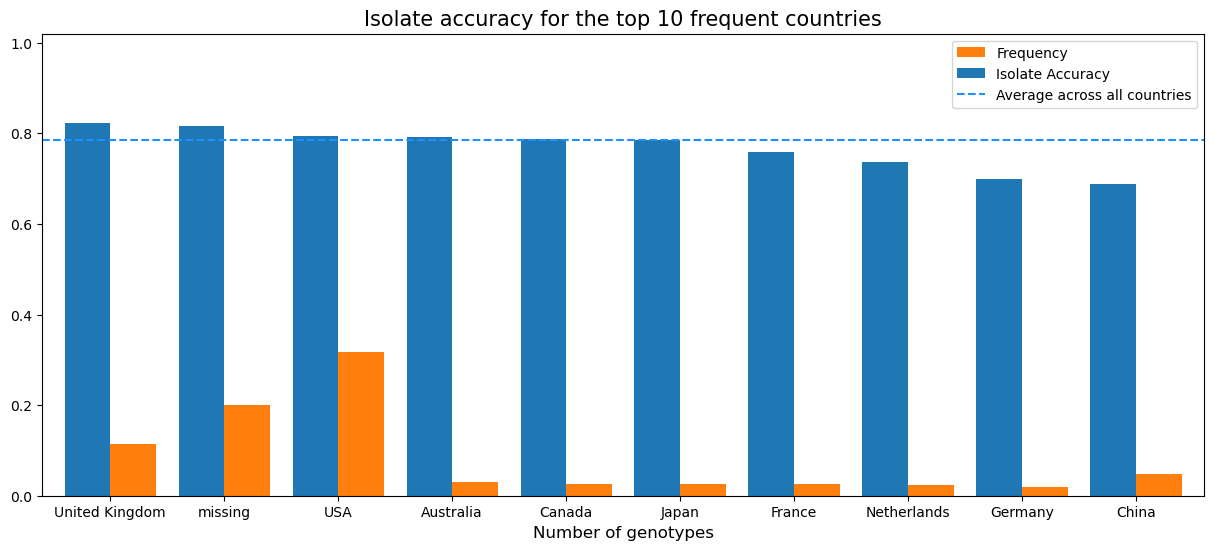

In [41]:
df_tmp = df_stats.groupby(df_stats['country'].fillna('missing')).agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
df_tmp.sort_values(by='count', ascending=False, inplace=True)
df_tmp_plot = df_tmp.iloc[:10].sort_values(by='accuracy', ascending=False)
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp_plot['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp_plot['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
avg_acc = df_tmp['accuracy'].mean()
ax.axhline(y=avg_acc, color='dodgerblue', linestyle='--', label='temp')
ax.set_title('Isolate accuracy for the top 10 frequent countries', fontsize=15)
ax.set_xlabel('Number of genotypes', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp_plot.shape[0] - 0.4)
handles, _ = ax.get_legend_handles_labels()
labels = ['Average across all countries', 'Isolate Accuracy', 'Frequency']
ax.legend(handles[::-1], labels[::-1], loc='upper right', fontsize=10)
plt.show()

**Fig 4**: Isolate accuracy for the regions

In [42]:
import yaml
with open('config_geno.yaml', 'r') as f:
    config = yaml.safe_load(f)

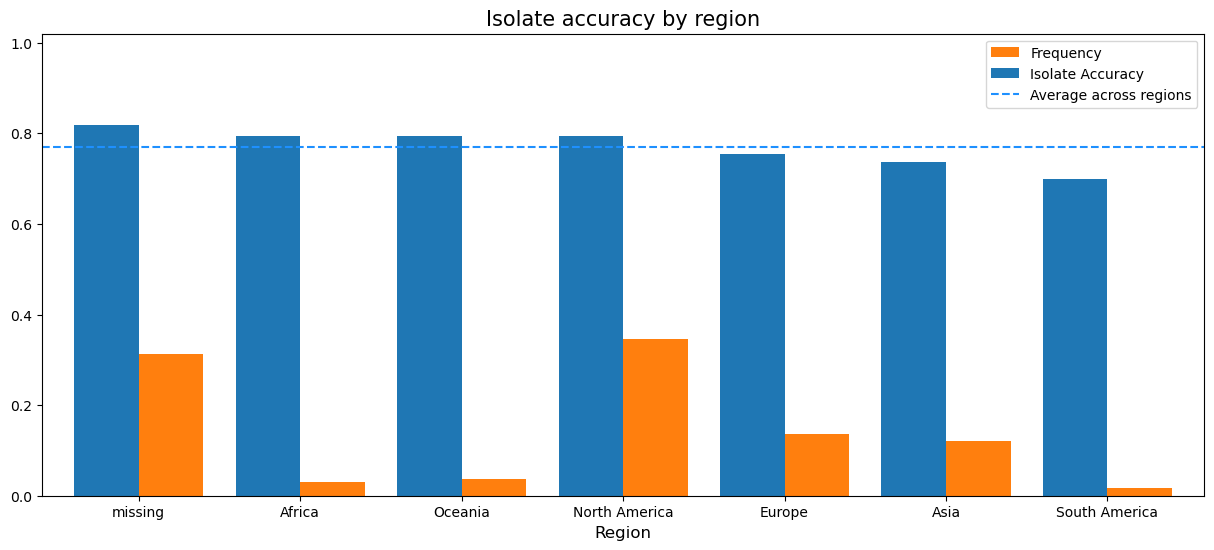

In [43]:
region_mapping = config['data']['region_mapping']
df_tmp = df_stats.copy()
df_tmp['region'] = df_tmp['country'].map(region_mapping)
df_tmp = df_tmp.groupby(df_tmp['region'].fillna('missing')).agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
df_tmp.sort_values(by='accuracy', ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
avg_acc = df_tmp['accuracy'].mean()
ax.axhline(y=avg_acc, color='dodgerblue', linestyle='--', label='temp')
ax.set_title('Isolate accuracy by region', fontsize=15)
ax.set_xlabel('Region', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
handles, _ = ax.get_legend_handles_labels()
labels = ['Average across regions', 'Isolate Accuracy', 'Frequency']
ax.legend(handles[::-1], labels[::-1], loc='upper right', fontsize=10)
plt.show()

**Fig 5**: Isolate accuracy for the years

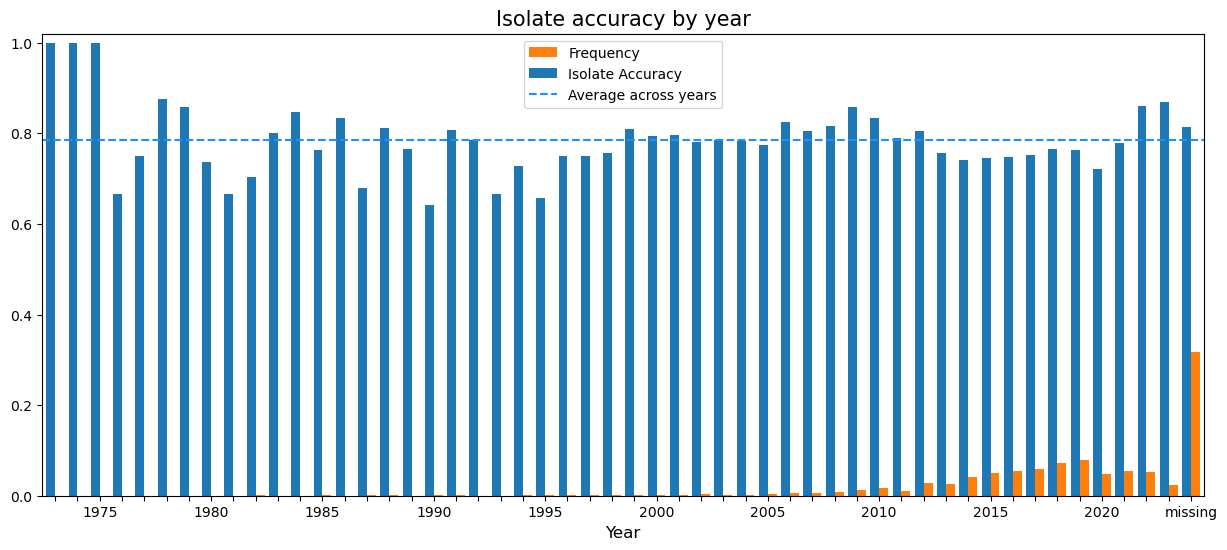

In [44]:
df_tmp = df_stats.groupby(df_stats['year'].fillna('missing')).agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
# df_tmp = df_tmp[df_tmp['count'] > 20]
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
# df_tmp.sort_values(by='accuracy', ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
avg_acc = df_tmp['accuracy'].mean()
ax.axhline(y=avg_acc, color='dodgerblue', linestyle='--', label='temp')
ax.set_title('Isolate accuracy by year', fontsize=15)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
xticklabels = [x.get_text() for x in ax.get_xticklabels()][:-1]
xticklabels = ['' if float(x) % 5 != 0 else x[:-2] for x in xticklabels] + [ax.get_xticklabels()[-1].get_text()]
# xticklabels = ['' if i % 5 != 0 else xticklabels[i][:-2] for i in range(len(xticklabels))] 
ax.set_xticklabels(xticklabels)
# ax.set_xticks([i for i in range(len(xticklabels))])
handles, _ = ax.get_legend_handles_labels()
labels = ['Average across years', 'Isolate Accuracy', 'Frequency']
ax.legend(handles[::-1], labels[::-1], loc='upper center', fontsize=10)
plt.show()

## Multimodal Model

### Masking by keeping one class

In [15]:
results_balancedPT = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_balancedPT_mask_probs_0.6_class', 'ft_results.pkl')) 
results_naive = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_naive_mask_probs_0.6_class', 'ft_results.pkl'))

#### Metrics

Comparing accuracy for each antibiotic against target and predicted resistance distribution

Pre-trained model

In [16]:
ab_stats = results_balancedPT['val_ab_stats']
ab_stats

,antibiotic,num_tot,num_S,num_R,num_pred_S,num_pred_R,num_correct,num_correct_S,num_correct_R,accuracy,sensitivity,specificity,precision,F1
0,CIP,751,611,140,611,140,751,611,140,1.0,1.0,1.0,1.0,1.0
1,LVX,322,230,92,230,92,322,230,92,1.0,1.0,1.0,1.0,1.0
2,CTX,101,12,89,12,89,101,12,89,1.0,1.0,1.0,1.0,1.0
3,TOB,308,281,27,281,27,308,281,27,1.0,1.0,1.0,1.0,1.0
4,GEN,647,574,73,574,73,647,574,73,1.0,1.0,1.0,1.0,1.0
5,FEP,434,358,76,358,76,434,358,76,1.0,1.0,1.0,1.0,1.0
6,CAZ,444,318,126,318,126,444,318,126,1.0,1.0,1.0,1.0,1.0
7,PIP,1,0,1,0,1,1,0,1,1.0,1.0,NaN,1.0,1.0
8,CRO,683,569,114,569,114,683,569,114,1.0,1.0,1.0,1.0,1.0
9,AMC,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


Counts 

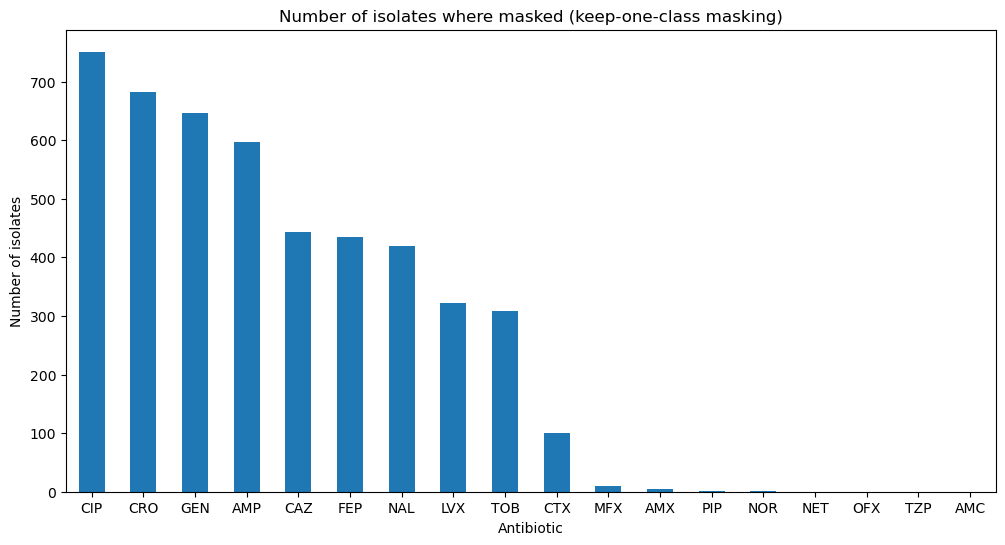

In [17]:
sorted_ab_stats = ab_stats.sort_values(by='num_tot', ascending=False)
sorted_ab_stats.set_index('antibiotic', inplace=True)
sorted_ab_stats['num_tot'].plot.bar(rot=0, figsize=(12, 6))
plt.title("Number of isolates where masked (keep-one-class masking)")
plt.ylabel("Number of isolates")
plt.xlabel("Antibiotic")
plt.show()

Accuracy

C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\4001297078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\4001297078.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\4001297078.py:6: SettingWithCopyWarning: 
A value is trying to be set on

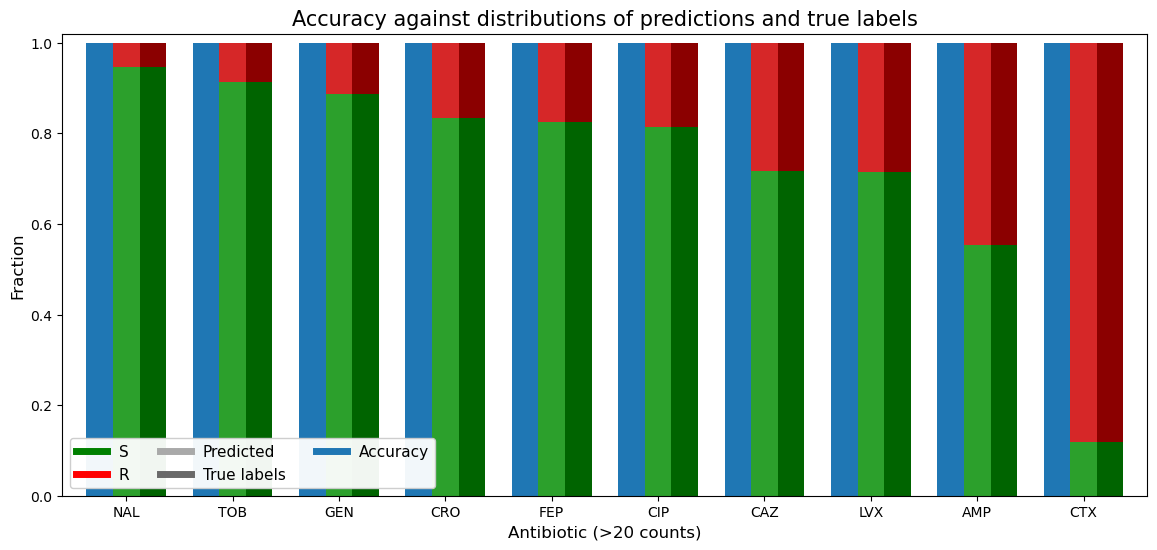

In [20]:
ab_stats = results_balancedPT['val_ab_stats']
sorted_ab_stats = ab_stats[ab_stats['num_tot'] > 20]
sorted_ab_stats.set_index('antibiotic', inplace=True)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats = sorted_ab_stats.sort_values(by='S_frac', ascending=False)

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(14, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['accuracy'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('Accuracy against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (>20 counts)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'Accuracy'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

Isolate accuracy against number of antibiotics masked

In [25]:
iso_stats = results_balancedPT['val_iso_stats']
df_stats = iso_stats.copy()

,year,country,num_ab,num_genotypes,num_point_mutations,ab_classes,num_masked,num_masked_S,num_masked_R,num_correct,correct_S,correct_R,sensitivity,specificity,accuracy,all_correct
0,2019,USA,5.0,3,2,"[4, 2, 3, 0, 3]",4,3,1,4,3,1,1.0,1.0,1.0,True
1,2020,USA,8.0,18,9,"[4, 2, 2, 2, 3, 0, 3, 0]",7,3,4,7,3,4,1.0,1.0,1.0,True
2,2017,USA,6.0,18,8,"[4, 2, 2, 3, 0, 0]",5,3,2,5,3,2,1.0,1.0,1.0,True
3,2020,USA,8.0,3,2,"[4, 2, 2, 2, 3, 0, 3, 0]",7,7,0,7,7,0,NaN,1.0,1.0,True
4,2019,USA,8.0,2,2,"[4, 2, 2, 2, 3, 0, 3, 0]",6,6,0,6,6,0,NaN,1.0,1.0,True
5,2021,Netherlands,7.0,10,2,"[4, 2, 2, 2, 3, 0, 3]",6,2,4,6,2,4,1.0,1.0,1.0,True
6,2019,USA,5.0,4,2,"[4, 2, 3, 0, 3]",4,3,1,4,3,1,1.0,1.0,1.0,True
7,2019,USA,5.0,2,2,"[4, 2, 3, 0, 3]",4,4,0,4,4,0,NaN,1.0,1.0,True
8,2020,USA,8.0,2,2,"[4, 2, 2, 2, 3, 0, 3, 0]",7,7,0,7,7,0,NaN,1.0,1.0,True
9,2018,USA,5.0,3,2,"[4, 2, 3, 0, 3]",3,3,0,3,3,0,NaN,1.0,1.0,True


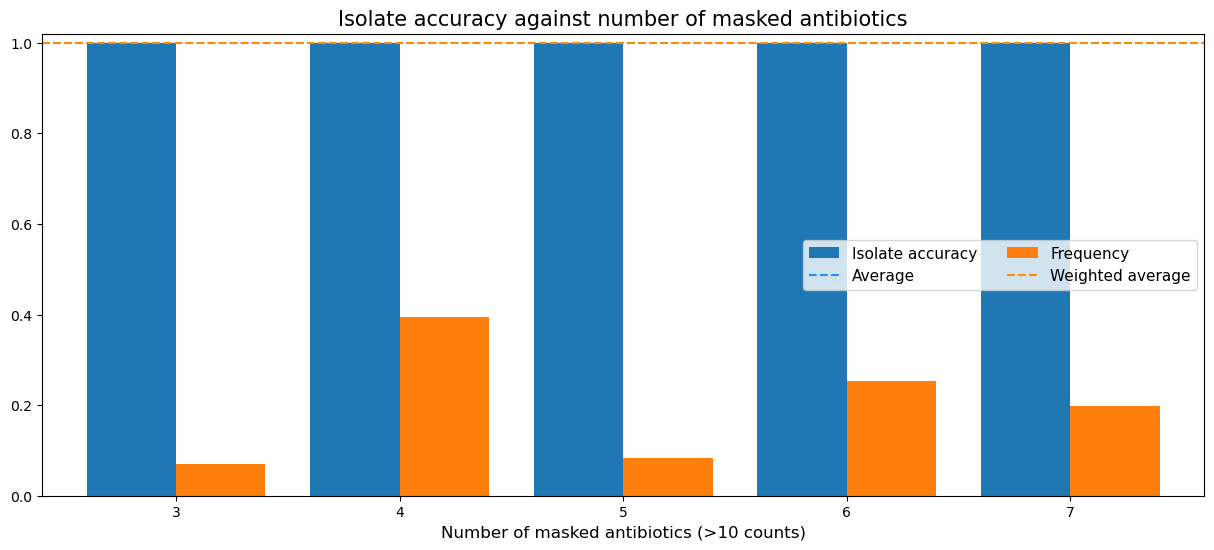

In [32]:
df_tmp = df_stats.groupby('num_masked').agg({'all_correct': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp = df_tmp[df_tmp['count'] > 10]
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
avg_acc = df_tmp['accuracy'].mean()
ax.axhline(avg_acc, color='dodgerblue', linestyle='--', label='temp')
weighted_avg_acc = (df_tmp['accuracy'] * df_tmp['share']).sum()
ax.axhline(weighted_avg_acc, color='darkorange', linestyle='--', label='temp2')
ax.set_title('Isolate accuracy against number of masked antibiotics', fontsize=15)
ax.set_xlabel('Number of masked antibiotics (>10 counts)', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
handles, tmp_labels = ax.get_legend_handles_labels()
tmp0 = handles[0]
tmp1 = handles[1]
handles[0] = handles[2]
handles[2] = handles[3]
handles[1] = tmp0
handles[3] = tmp1
labels=['Isolate accuracy', 'Average', 'Frequency', 'Weighted average']
ax.legend(handles, labels, loc='center right', fontsize=11, ncol=2)
plt.show()

Isolate accuracy against *share* of antibiotics masked

C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\2589823541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tmp = df_tmp.groupby('frac_masked_bin').agg({'all_correct': ['mean', 'count']})
C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\2589823541.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.1f} - {:.1f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])


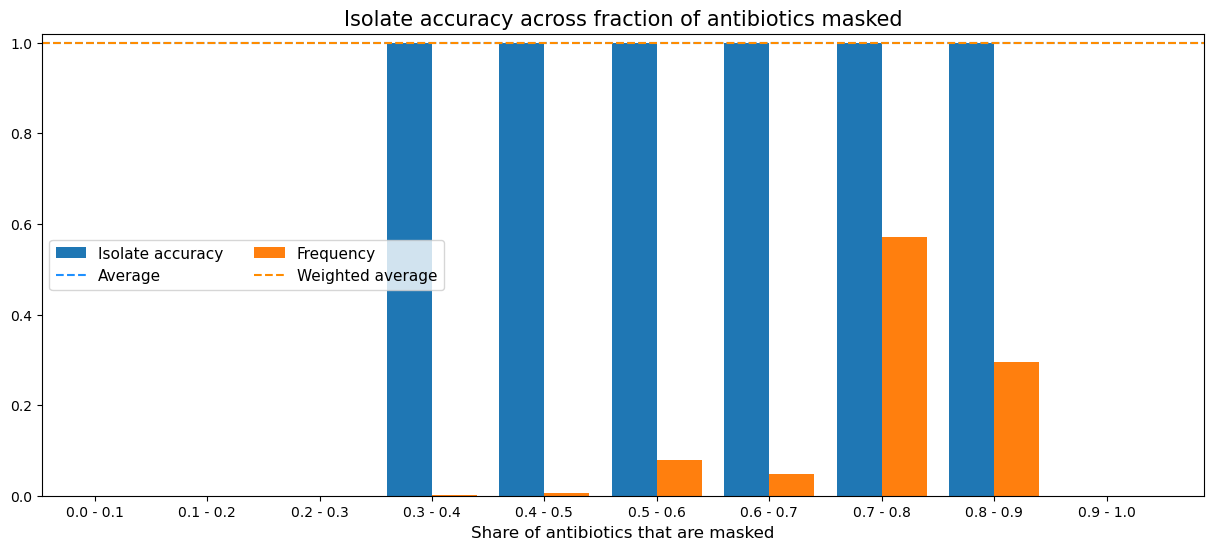

In [39]:
df_tmp = df_stats.copy()
df_tmp['frac_masked'] = df_tmp['num_masked'] / df_tmp['num_ab']
bins = np.linspace(0, 1, 11)
df_tmp['frac_masked_bin'] = pd.cut(df_tmp['frac_masked'], bins=bins)
df_tmp = df_tmp.groupby('frac_masked_bin').agg({'all_correct': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
df_tmp.head(n=20)
# Extracting the bin edges for labeling the x-axis
bin_edges = df_tmp.index.astype(str).tolist()

fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(bin_edges, df_tmp['accuracy'], color='tab:blue', 
       width=-0.4, align='edge', label='Accuracy')
ax.bar(bin_edges, df_tmp['share'], color='tab:orange',
         width=0.4, align='edge', label='Count')
avg_acc = df_tmp['accuracy'].mean()
ax.axhline(avg_acc, color='dodgerblue', linestyle='--', label='temp')
weighted_avg_acc = (df_tmp['accuracy'] * df_tmp['share']).sum()
ax.axhline(weighted_avg_acc, color='darkorange', linestyle='--', label='temp2')
ax.set_ylim(0, 1.02)
ax.set_title('Isolate accuracy across fraction of antibiotics masked', fontsize=15)
ax.set_xlabel('Share of antibiotics that are masked', fontsize=12)
ax.set_xticklabels(['{:.1f} - {:.1f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])
handles, tmp_labels = ax.get_legend_handles_labels()
tmp0 = handles[0]
tmp1 = handles[1]
handles[0] = handles[2]
handles[2] = handles[3]
handles[1] = tmp0
handles[3] = tmp1
labels=['Isolate accuracy', 'Average', 'Frequency', 'Weighted average']
ax.legend(handles, labels, loc='center left', fontsize=11, ncol=2)
plt.show()

### Masking by *k* known antibiotics, *k* = 1

In [51]:
results_balancedPT = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_balancedPT_mask_probs_0.6_1known', 'ft_results.pkl'))
results_naive = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_naive_mask_probs_0.6_1known', 'ft_results.pkl'))

#### Accuracy 

Pre-trained model

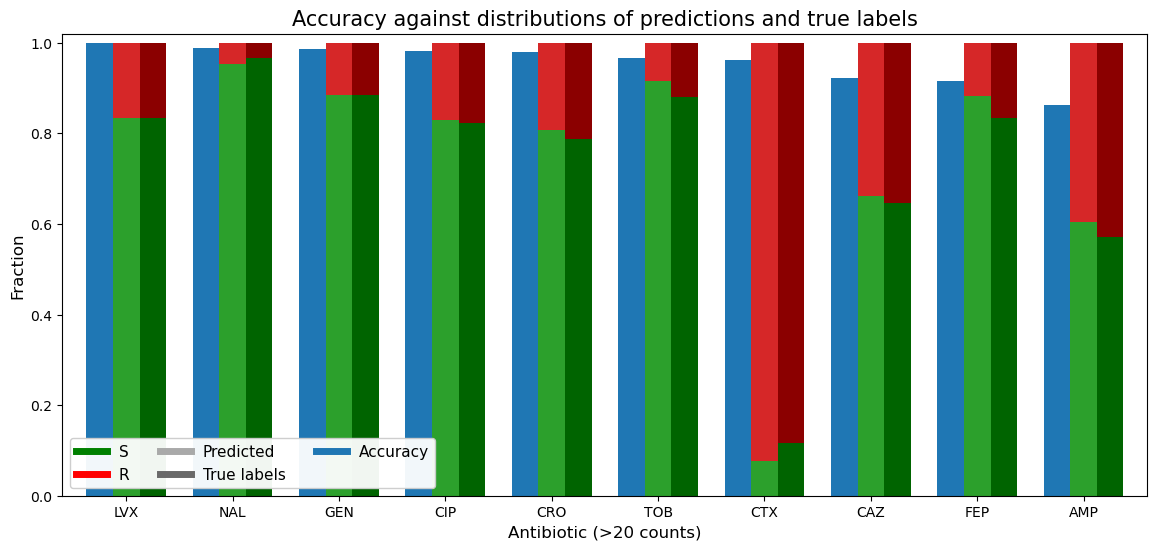

In [52]:
ab_stats = results_balancedPT['val_ab_stats']
ab_stats.set_index('antibiotic', inplace=True)
sorted_ab_stats = ab_stats[ab_stats['num_tot'] > 20]
sorted_ab_stats = sorted_ab_stats.sort_values(by='accuracy', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(14, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['accuracy'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('Accuracy against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (>20 counts)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'Accuracy'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

Naive model

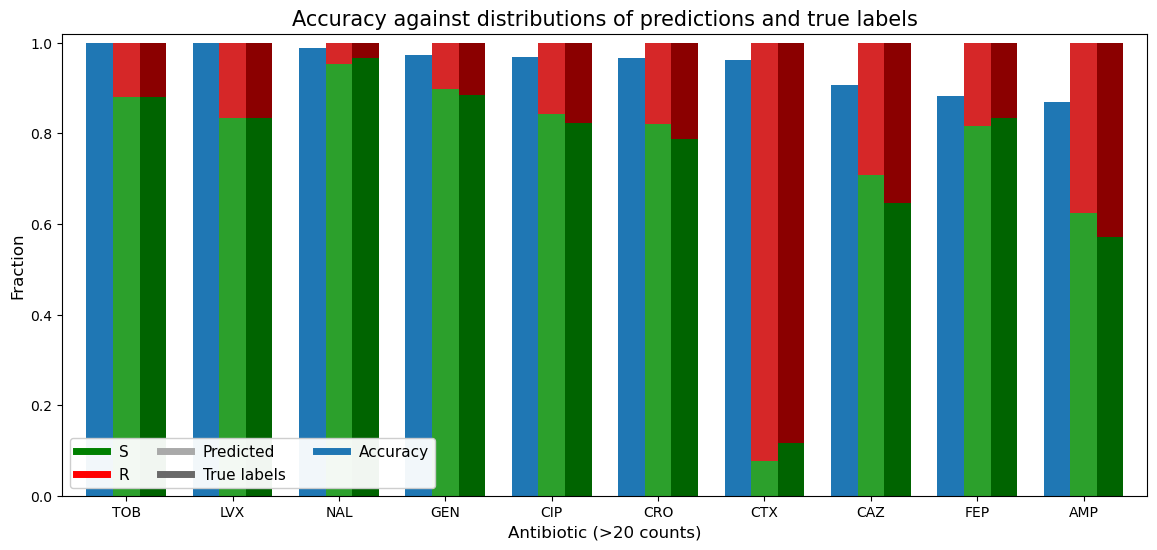

In [53]:
ab_stats = results_naive['val_ab_stats']
ab_stats.set_index('antibiotic', inplace=True)
sorted_ab_stats = ab_stats[ab_stats['num_tot'] > 20]
sorted_ab_stats = sorted_ab_stats.sort_values(by='accuracy', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(14, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['accuracy'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('Accuracy against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (>20 counts)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'Accuracy'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

Compare naive and pre-trained

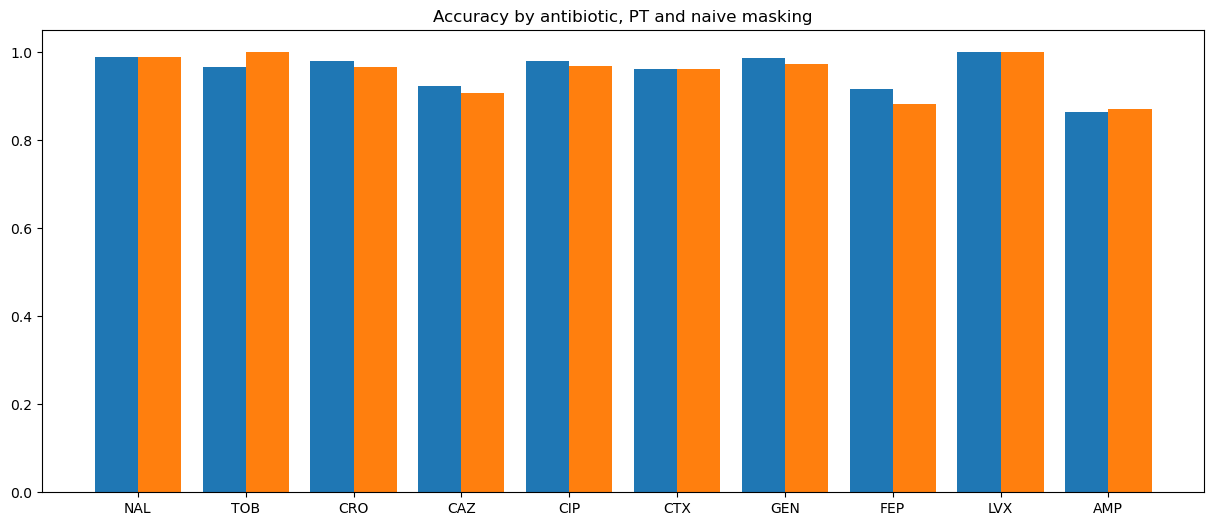

In [60]:
ab_stats_pt = results_balancedPT['val_ab_stats']
ab_stats_pt = ab_stats_pt[ab_stats_pt['num_tot'] > 20]
ab_stats_naive = results_naive['val_ab_stats']
ab_stats_naive = ab_stats_naive[ab_stats_naive['num_tot'] > 20]

fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(ab_stats_pt.index, ab_stats_pt['accuracy'], color='tab:blue', width=-0.4, align='edge', label='Accuracy')
ax.bar(ab_stats_naive.index, ab_stats_naive['accuracy'], color='tab:orange', width=0.4, align='edge', label='Count')
ax.set_title('Accuracy by antibiotic, PT and naive masking')
plt.show()

### Random masking - 60% geno, 80% pheno

In [92]:
results_hardPT = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_hardPT_mask_probs_0.6_0.8', 'ft_results.pkl'))
results_naive = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_naive_mask_probs_0.6_0.8', 'ft_results.pkl'))

#### Accuracy

Pre-trained model

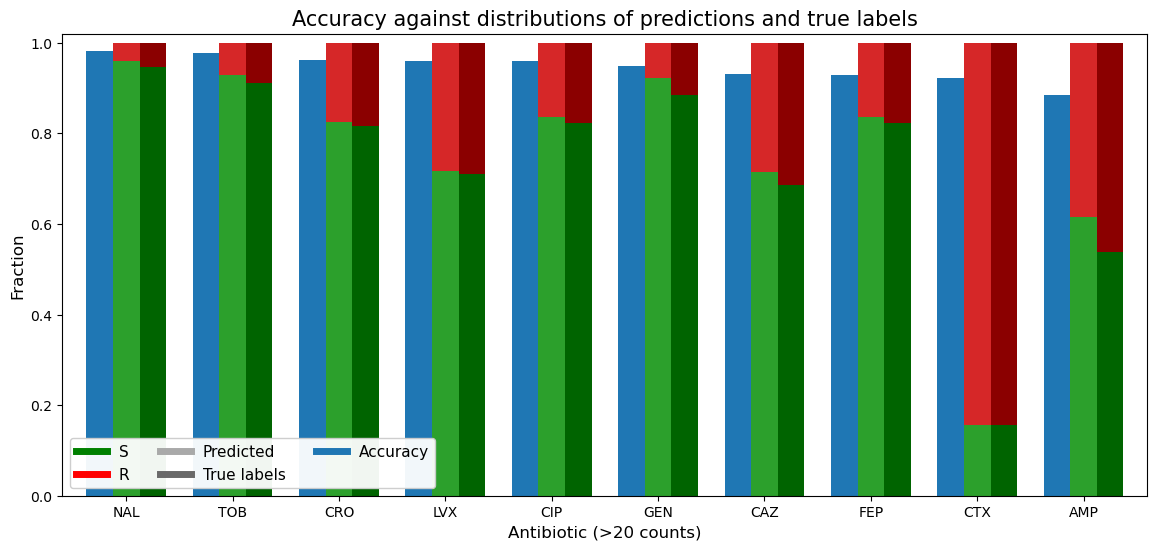

In [93]:
ab_stats = results_hardPT['val_ab_stats']
ab_stats.set_index('antibiotic', inplace=True)
sorted_ab_stats = ab_stats[ab_stats['num_tot'] > 20]
sorted_ab_stats = sorted_ab_stats.sort_values(by='accuracy', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(14, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['accuracy'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('Accuracy against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (>20 counts)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'Accuracy'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

Naive model

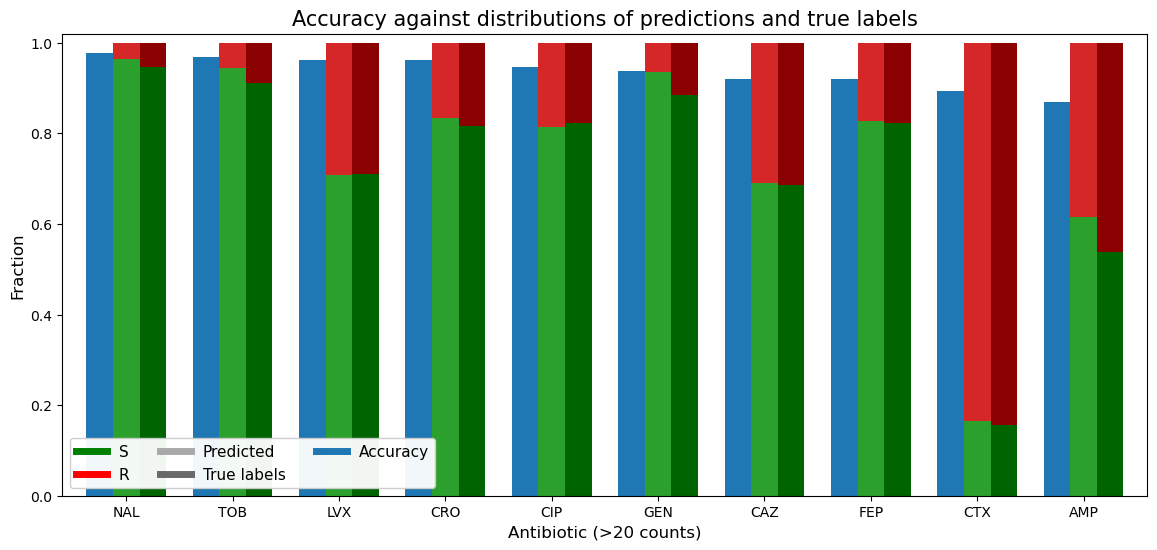

In [94]:
ab_stats = results_naive['val_ab_stats']
ab_stats.set_index('antibiotic', inplace=True)
sorted_ab_stats = ab_stats[ab_stats['num_tot'] > 20]
sorted_ab_stats = sorted_ab_stats.sort_values(by='accuracy', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(14, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['accuracy'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('Accuracy against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (>20 counts)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'Accuracy'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

Compare naive and pre-trained

C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\2087704553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\2087704553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\2087704553.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

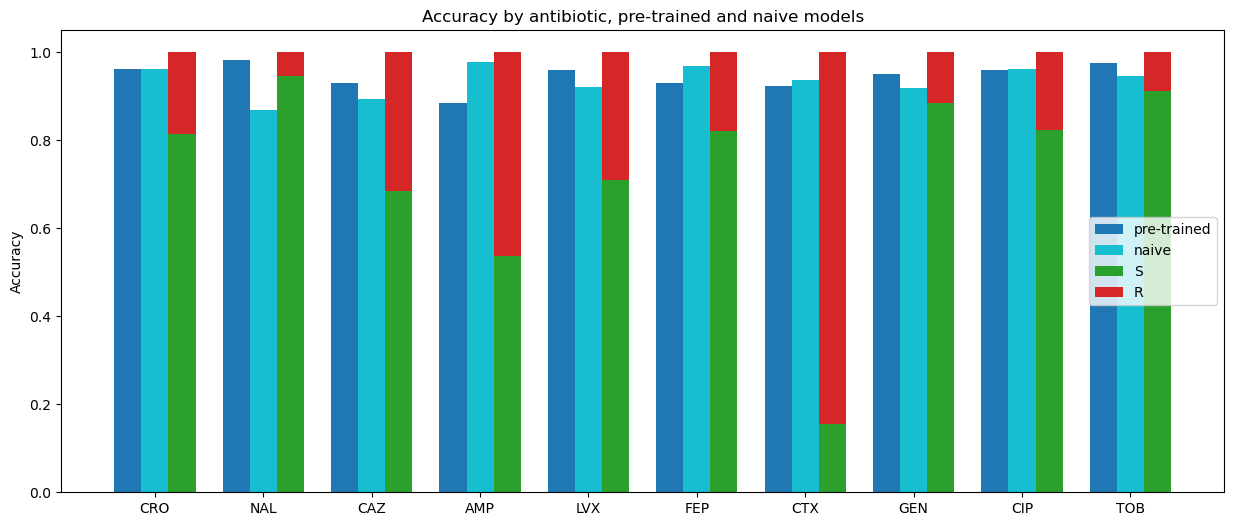

In [95]:
ab_stats_pt = results_hardPT['val_ab_stats']
ab_stats_pt = ab_stats_pt[ab_stats_pt['num_tot'] > 20]
ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
ab_stats_naive = results_naive['val_ab_stats']
ab_stats_naive = ab_stats_naive[ab_stats_naive['num_tot'] > 20]
ab_stats_naive['S_frac'] = ab_stats_naive['num_S'] / ab_stats_naive['num_tot']
ab_stats_naive['R_frac'] = ab_stats_naive['num_R'] / ab_stats_naive['num_tot']

fig, ax = plt.subplots(figsize=(15, 6))
ind = np.arange(len(ab_stats_pt))
bar_width = 0.25
ax.bar(ind - bar_width, ab_stats_pt['accuracy'], bar_width, color='tab:blue', label='pre-trained')
ax.bar(ind, ab_stats_naive['accuracy'], bar_width, color='tab:cyan', label='naive')
ax.bar(ind + bar_width, ab_stats_pt['S_frac'], bar_width, color='tab:green', label='S')
ax.bar(ind + bar_width, ab_stats_pt['R_frac'], bar_width, bottom=ab_stats_pt['S_frac'], color='tab:red', label='R')

ax.set_title('Accuracy by antibiotic, pre-trained and naive models')
ax.set_xticks(ind, ab_stats_pt.index)
plt.ylabel('Accuracy')
plt.legend(loc='center right')
plt.show()

Compare for sensitivity, specificity and F1

C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\3348240359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\3348240359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\3348240359.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

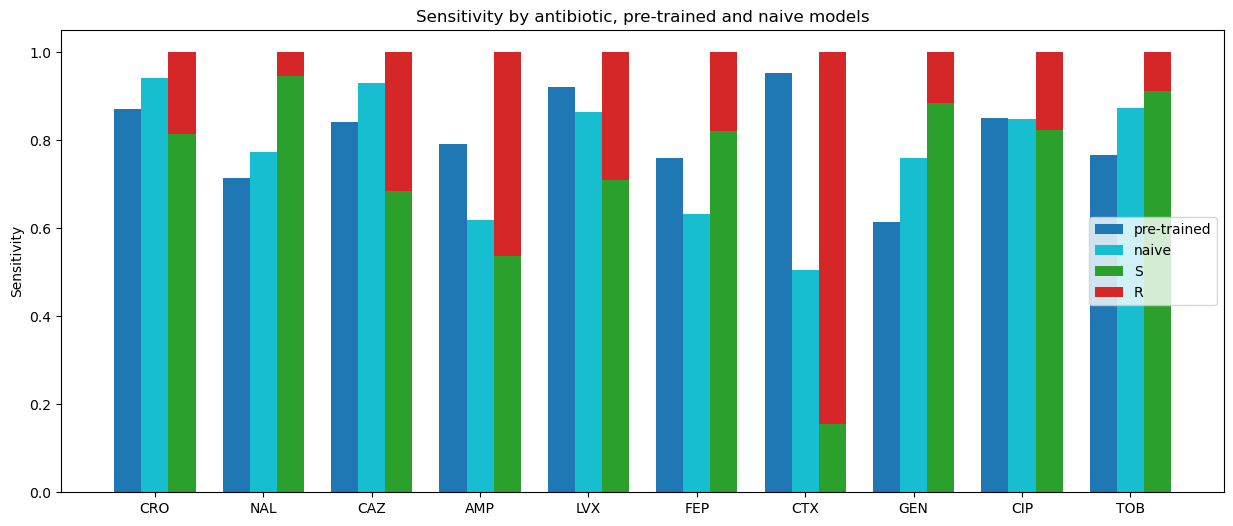

In [96]:
ab_stats_pt = results_hardPT['val_ab_stats']
ab_stats_pt = ab_stats_pt[ab_stats_pt['num_tot'] > 20]
ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
ab_stats_naive = results_naive['val_ab_stats']
ab_stats_naive = ab_stats_naive[ab_stats_naive['num_tot'] > 20]
ab_stats_naive['S_frac'] = ab_stats_naive['num_S'] / ab_stats_naive['num_tot']
ab_stats_naive['R_frac'] = ab_stats_naive['num_R'] / ab_stats_naive['num_tot']

fig, ax = plt.subplots(figsize=(15, 6))
ind = np.arange(len(ab_stats_pt))
bar_width = 0.25
ax.bar(ind - bar_width, ab_stats_pt['sensitivity'], bar_width, color='tab:blue', label='pre-trained')
ax.bar(ind, ab_stats_naive['sensitivity'], bar_width, color='tab:cyan', label='naive')
ax.bar(ind + bar_width, ab_stats_pt['S_frac'], bar_width, color='tab:green', label='S')
ax.bar(ind + bar_width, ab_stats_pt['R_frac'], bar_width, bottom=ab_stats_pt['S_frac'], color='tab:red', label='R')

ax.set_title('Sensitivity by antibiotic, pre-trained and naive models')
ax.set_xticks(ind, ab_stats_pt.index)
plt.ylabel('Sensitivity')
plt.legend(loc='center right')
plt.show()

C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\2259624284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\2259624284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\2259624284.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

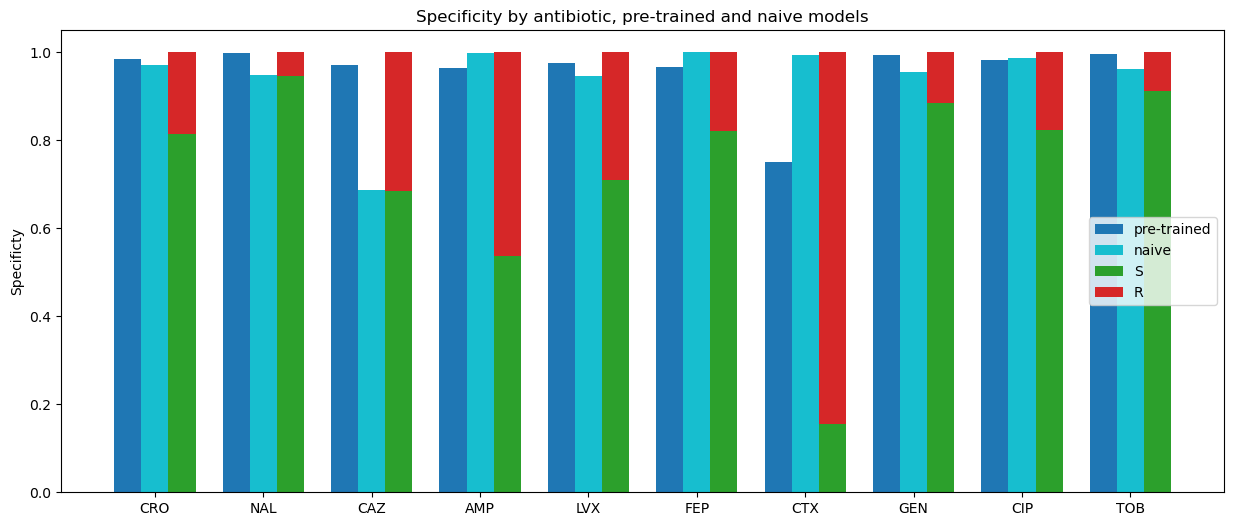

In [97]:
ab_stats_pt = results_hardPT['val_ab_stats']
ab_stats_pt = ab_stats_pt[ab_stats_pt['num_tot'] > 20]
ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
ab_stats_naive = results_naive['val_ab_stats']
ab_stats_naive = ab_stats_naive[ab_stats_naive['num_tot'] > 20]
ab_stats_naive['S_frac'] = ab_stats_naive['num_S'] / ab_stats_naive['num_tot']
ab_stats_naive['R_frac'] = ab_stats_naive['num_R'] / ab_stats_naive['num_tot']

fig, ax = plt.subplots(figsize=(15, 6))
ind = np.arange(len(ab_stats_pt))
bar_width = 0.25
ax.bar(ind - bar_width, ab_stats_pt['specificity'], bar_width, color='tab:blue', label='pre-trained')
ax.bar(ind, ab_stats_naive['specificity'], bar_width, color='tab:cyan', label='naive')
ax.bar(ind + bar_width, ab_stats_pt['S_frac'], bar_width, color='tab:green', label='S')
ax.bar(ind + bar_width, ab_stats_pt['R_frac'], bar_width, bottom=ab_stats_pt['S_frac'], color='tab:red', label='R')

ax.set_title('Specificity by antibiotic, pre-trained and naive models')
ax.set_xticks(ind, ab_stats_pt.index)
plt.ylabel('Specificty')
plt.legend(loc='center right')
plt.show()

C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\1147329750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\1147329750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\1147329750.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

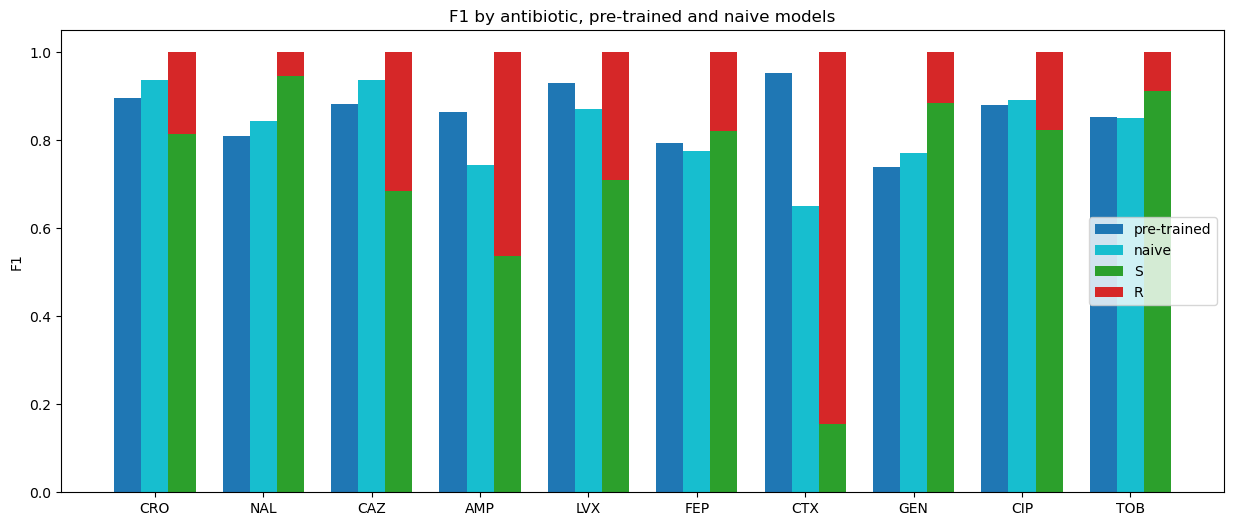

In [98]:
ab_stats_pt = results_hardPT['val_ab_stats']
ab_stats_pt = ab_stats_pt[ab_stats_pt['num_tot'] > 20]
ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
ab_stats_naive = results_naive['val_ab_stats']
ab_stats_naive = ab_stats_naive[ab_stats_naive['num_tot'] > 20]
ab_stats_naive['S_frac'] = ab_stats_naive['num_S'] / ab_stats_naive['num_tot']
ab_stats_naive['R_frac'] = ab_stats_naive['num_R'] / ab_stats_naive['num_tot']

fig, ax = plt.subplots(figsize=(15, 6))
ind = np.arange(len(ab_stats_pt))
bar_width = 0.25
ax.bar(ind - bar_width, ab_stats_pt['F1'], bar_width, color='tab:blue', label='pre-trained')
ax.bar(ind, ab_stats_naive['F1'], bar_width, color='tab:cyan', label='naive')
ax.bar(ind + bar_width, ab_stats_pt['S_frac'], bar_width, color='tab:green', label='S')
ax.bar(ind + bar_width, ab_stats_pt['R_frac'], bar_width, bottom=ab_stats_pt['S_frac'], color='tab:red', label='R')

ax.set_title('F1 by antibiotic, pre-trained and naive models')
ax.set_xticks(ind, ab_stats_pt.index)
plt.ylabel('F1')
plt.legend(loc='center right')
plt.show()